### **HW5_Artificial Inteligence**
### **Mohammad Mahdi Touiserkani**
### **Student Number: 810603005**

### **Part A: Implementation of Models**

### ***Step 1: Preparing Models***

### ***Step 1-1: Load and Select Data***

### ***Step 1-1-1: Load the FD001 subset***

In [1]:
import pandas as pd

# Define column names
column_names = ['unit', 'time'] + [f'op_setting_{i}' for i in range(1, 4)] + [f'sensor_{i}' for i in range(1, 22)]

# Load the datasets
train_file = 'G:/Artificial_Intelligence/Tamrin/Tamrin5/6. Turbofan Engine Degradation Simulation Data Set/CMAPSSData/train_FD001.txt'
test_file = 'G:/Artificial_Intelligence/Tamrin/Tamrin5/6. Turbofan Engine Degradation Simulation Data Set/CMAPSSData/test_FD001.txt'
rul_file = 'G:/Artificial_Intelligence/Tamrin/Tamrin5/6. Turbofan Engine Degradation Simulation Data Set/CMAPSSData/RUL_FD001.txt'

train_df = pd.read_csv(train_file, sep=' ', header=None)
test_df = pd.read_csv(test_file, sep=' ', header=None)
rul_df = pd.read_csv(rul_file, sep=' ', header=None)

# Drop empty columns at the end
train_df.drop(train_df.columns[[26, 27]], axis=1, inplace=True)
test_df.drop(test_df.columns[[26, 27]], axis=1, inplace=True)

# Assign column names
train_df.columns = test_df.columns = column_names

# Show dataset shapes
print("Train Set Shape:", train_df.shape)
print("Test Set Shape:", test_df.shape)
print("RUL Set Shape:", rul_df.shape)

# Show sample rows
print("\n Train Set:")
display(train_df.head())

print("\n Test Set:")
display(test_df.head())

print("\n RUL values:")
display(rul_df.head())

Train Set Shape: (20631, 26)
Test Set Shape: (13096, 26)
RUL Set Shape: (100, 2)

 Train Set:


unit  time  op_setting_1  op_setting_2  op_setting_3  sensor_1  sensor_2  \
0     1     1       -0.0007       -0.0004         100.0    518.67    641.82   
1     1     2        0.0019       -0.0003         100.0    518.67    642.15   
2     1     3       -0.0043        0.0003         100.0    518.67    642.35   
3     1     4        0.0007        0.0000         100.0    518.67    642.35   
4     1     5       -0.0019       -0.0002         100.0    518.67    642.37   

   sensor_3  sensor_4  sensor_5  ...  sensor_12  sensor_13  sensor_14  \
0   1589.70   1400.60     14.62  ...     521.66    2388.02    8138.62   
1   1591.82   1403.14     14.62  ...     522.28    2388.07    8131.49   
2   1587.99   1404.20     14.62  ...     522.42    2388.03    8133.23   
3   1582.79   1401.87     14.62  ...     522.86    2388.08    8133.83   
4   1582.85   1406.22     14.62  ...     522.19    2388.04    8133.80   

   sensor_15  sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  sensor_21  
0     8.4195       0.03        392       2388      100.0      39.06    23.4190  
1     8.4318       0.03        392       2388      100.0      39.00    23.4236  
2     8.4178       0.03        390       2388      100.0      38.95    23.3442  
3     8.3682       0.03        392       2388      100.0      38.88    23.3739  
4     8.4294       0.03        393       2388      100.0      38.90    23.4044  

[5 rows x 26 columns]


 Test Set:


unit  time  op_setting_1  op_setting_2  op_setting_3  sensor_1  sensor_2  \
0     1     1        0.0023        0.0003         100.0    518.67    643.02   
1     1     2       -0.0027       -0.0003         100.0    518.67    641.71   
2     1     3        0.0003        0.0001         100.0    518.67    642.46   
3     1     4        0.0042        0.0000         100.0    518.67    642.44   
4     1     5        0.0014        0.0000         100.0    518.67    642.51   

   sensor_3  sensor_4  sensor_5  ...  sensor_12  sensor_13  sensor_14  \
0   1585.29   1398.21     14.62  ...     521.72    2388.03    8125.55   
1   1588.45   1395.42     14.62  ...     522.16    2388.06    8139.62   
2   1586.94   1401.34     14.62  ...     521.97    2388.03    8130.10   
3   1584.12   1406.42     14.62  ...     521.38    2388.05    8132.90   
4   1587.19   1401.92     14.62  ...     522.15    2388.03    8129.54   

   sensor_15  sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  sensor_21  
0     8.4052       0.03        392       2388      100.0      38.86    23.3735  
1     8.3803       0.03        393       2388      100.0      39.02    23.3916  
2     8.4441       0.03        393       2388      100.0      39.08    23.4166  
3     8.3917       0.03        391       2388      100.0      39.00    23.3737  
4     8.4031       0.03        390       2388      100.0      38.99    23.4130  

[5 rows x 26 columns]


 RUL values:


0   1
0  112 NaN
1   98 NaN
2   69 NaN
3   82 NaN
4   91 NaN

### ***Step 1-1-2: Remove the Low Variance Features***

In [3]:
from sklearn.feature_selection import VarianceThreshold

# Select sensor features only (excluding unit and time)
sensor_features = train_df.iloc[:, 2:]

# Apply variance threshold
selector = VarianceThreshold(threshold=1e-5)
selector.fit(sensor_features)

# Get low-variance features
low_variance_features = sensor_features.columns[~selector.get_support()]
print("Removed Low Variance Features:", list(low_variance_features))

# Drop them from both train and test
train_df.drop(columns=low_variance_features, inplace=True)
test_df.drop(columns=low_variance_features, inplace=True)

Removed Low Variance Features: ['op_setting_1', 'op_setting_2', 'op_setting_3', 'sensor_1', 'sensor_5', 'sensor_6', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19']


### ***Step 1-1-3: Identify the Duplicate or Highly Similar Features and keep one of them***

In [7]:
import numpy as np

# Function to identify duplicate features
def find_duplicate_features(df):
    duplicates = []
    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()
    # Get the upper triangle of the correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    # Find features with high correlation (>0.95)
    for column in upper.columns:
        if any(upper[column] > 0.95):
            duplicates.append(column)
    return duplicates

# Find duplicate features in the train and test datasets separately
train_duplicates = find_duplicate_features(train_df)
test_duplicates = find_duplicate_features(test_df)

# Display the duplicate features
print("Duplicate or highly similar features in the training data:")
for feature in train_duplicates:
    print(feature)

print("\nDuplicate or highly similar features in the test data:")
for feature in test_duplicates:
    print(feature)

# Drop duplicate features from the original datasets
train_cleaned = train_df.drop(columns=train_duplicates, errors='ignore')
test_cleaned = test_df.drop(columns=test_duplicates, errors='ignore')

# Ensure the number of features in train and test datasets are equal
if train_cleaned.shape[1] > test_cleaned.shape[1]:
    train_cleaned = train_cleaned.iloc[:, :test_cleaned.shape[1]]
elif test_cleaned.shape[1] > train_cleaned.shape[1]:
    test_cleaned = test_cleaned.iloc[:, :train_cleaned.shape[1]]

# Display the cleaned datasets
print("\nShape of training data after cleaning:", train_cleaned.shape)
print("Shape of test data after cleaning:", test_cleaned.shape)

Duplicate or highly similar features in the training data:
sensor_14

Duplicate or highly similar features in the test data:

Shape of training data after cleaning: (20631, 15)
Shape of test data after cleaning: (13096, 15)


### ***Step 1-1-4: Identify and Remove the Low correlated Features***

In [9]:
import numpy as np

# Compute correlation matrix
corr_matrix = train_df.iloc[:, 2:].corr().abs()

# Take upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify features with correlation < 0.1
low_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] < 0.05)]

# Drop them from both train and test
print("Removed Low Correlated Features:", low_corr_features)
train_df.drop(columns=low_corr_features, inplace=True)
test_df.drop(columns=low_corr_features, inplace=True)

Removed Low Correlated Features: ['sensor_9', 'sensor_13']


### ***Step 1-1-5: Identify and Remove the Low Importance Features***

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Create temporary RUL column: RUL = max(time) - current time
train_df['RUL'] = train_df.groupby('unit')['time'].transform(max) - train_df['time']

# Features for importance (excluding unit, time, RUL)
X_temp = train_df.drop(columns=['unit', 'time', 'RUL'])
y_temp = train_df['RUL']

# Fit Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_temp, y_temp)

# Feature importances
importances = rf.feature_importances_
feature_importance_series = pd.Series(importances, index=X_temp.columns).sort_values(ascending=False)

# Display all features ranked by importance
print("All Features Ranked by Importance:")
print(feature_importance_series)

# Optionally: remove features with very low importance (< 0.01)
low_importance_features = feature_importance_series[feature_importance_series < 0.01].index.tolist()
print("\n Features Removed due to Low Importance (<0.01):")
print(low_importance_features)

# Drop them
train_df.drop(columns=low_importance_features, inplace=True)
test_df.drop(columns=low_importance_features, inplace=True)

C:\Users\Homa Rayaneh\AppData\Local\Temp\ipykernel_10232\2734702117.py:4: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  train_df['RUL'] = train_df.groupby('unit')['time'].transform(max) - train_df['time']


All Features Ranked by Importance:
sensor_11    0.450903
sensor_14    0.125161
sensor_4     0.102381
sensor_12    0.052343
sensor_7     0.046419
sensor_15    0.042694
sensor_21    0.040541
sensor_3     0.037168
sensor_2     0.035001
sensor_20    0.030088
sensor_8     0.024941
sensor_17    0.012360
dtype: float64

 Features Removed due to Low Importance (<0.01):
[]


### ***Final Train/Test Shape and Features***

In [13]:
# Get feature columns (excluding 'unit' and 'time')
train_features = set(train_df.columns) - {'unit', 'time'}
test_features = set(test_df.columns) - {'unit', 'time'}

# Find common features
common_features = sorted(list(train_features & test_features))

print("Common features kept in both train and test (", len(common_features), "):")
print(common_features)

# Keep only common features + unit + time
train_df = train_df[['unit', 'time'] + common_features]
test_df = test_df[['unit', 'time'] + common_features]

Common features kept in both train and test ( 12 ):
['sensor_11', 'sensor_12', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_2', 'sensor_20', 'sensor_21', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8']


In [15]:
print("Final Train Shape:", train_df.shape)
print("Final Test Shape:", test_df.shape)
print("Final Selected Features:", train_df.columns.tolist())

Final Train Shape: (20631, 14)
Final Test Shape: (13096, 14)
Final Selected Features: ['unit', 'time', 'sensor_11', 'sensor_12', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_2', 'sensor_20', 'sensor_21', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8']


### ***Step 1-2: Sliding Window and Labeling Windows with the amount of RUL***

In [17]:
import numpy as np

def generate_sliding_windows(df, window_size=30, max_rul=130):
    X = []
    y = []

    # Get feature columns
    feature_cols = df.columns.difference(['unit', 'time'])

    # Process per unit
    for unit_id in df['unit'].unique():
        unit_df = df[df['unit'] == unit_id].sort_values('time')
        unit_data = unit_df[feature_cols].values
        num_cycles = unit_data.shape[0]

        # Compute RUL for each cycle
        rul_values = np.flip(np.arange(num_cycles))  # reverse counting
        rul_values = np.clip(rul_values, a_min=None, a_max=max_rul)

        # Apply sliding window
        for i in range(num_cycles - window_size + 1):
            window = unit_data[i: i + window_size]
            label = rul_values[i + window_size - 1]
            X.append(window)
            y.append(label)

    return np.array(X), np.array(y)

### ***Step 1-3: Labeling Windows with the amount of RUL***

In [19]:
# Set window size and max RUL
WINDOW_SIZE = 30
MAX_RUL = 130

# Generate training samples
X_train, y_train = generate_sliding_windows(train_df, window_size=WINDOW_SIZE, max_rul=MAX_RUL)
print(" Training set shape:", X_train.shape, y_train.shape)

# For test data, use the LAST window of each engine
def generate_last_test_windows(test_df, rul_df, window_size=30, max_rul=130):
    X_test = []
    y_test = []
    feature_cols = test_df.columns.difference(['unit', 'time'])

    for idx, unit_id in enumerate(test_df['unit'].unique()):
        unit_df = test_df[test_df['unit'] == unit_id].sort_values('time')
        unit_data = unit_df[feature_cols].values

        if len(unit_data) >= window_size:
            last_window = unit_data[-window_size:]
        else:
            padding = np.repeat(unit_data[0:1], window_size - len(unit_data), axis=0)
            last_window = np.concatenate([padding, unit_data], axis=0)

        # Ensure we're accessing within bounds
        rul_index = min(idx, len(rul_df) - 1)
        rul = min(rul_df.iloc[rul_index, 0], max_rul)
        X_test.append(last_window)
        y_test.append(rul)

    return np.array(X_test), np.array(y_test)

# Apply to test set
X_test, y_test = generate_last_test_windows(test_df, rul_df, window_size=WINDOW_SIZE, max_rul=MAX_RUL)
print(" Test set shape:", X_test.shape, y_test.shape)

 Training set shape: (17731, 30, 12) (17731,)
 Test set shape: (100, 30, 12) (100,)


### ***Step 1-4: Correlation with Target and Compute Correlation Matrix***

Feature Correlation with Target (RUL):
sensor_20    0.776686
sensor_21    0.776526
sensor_7     0.751067
sensor_12    0.746763
sensor_14   -0.335537
sensor_8    -0.602360
sensor_11   -0.767289
sensor_4    -0.775173
sensor_2    -0.775893
sensor_15   -0.779815
sensor_3    -0.789230
sensor_17   -0.793409
Name: RUL, dtype: float64


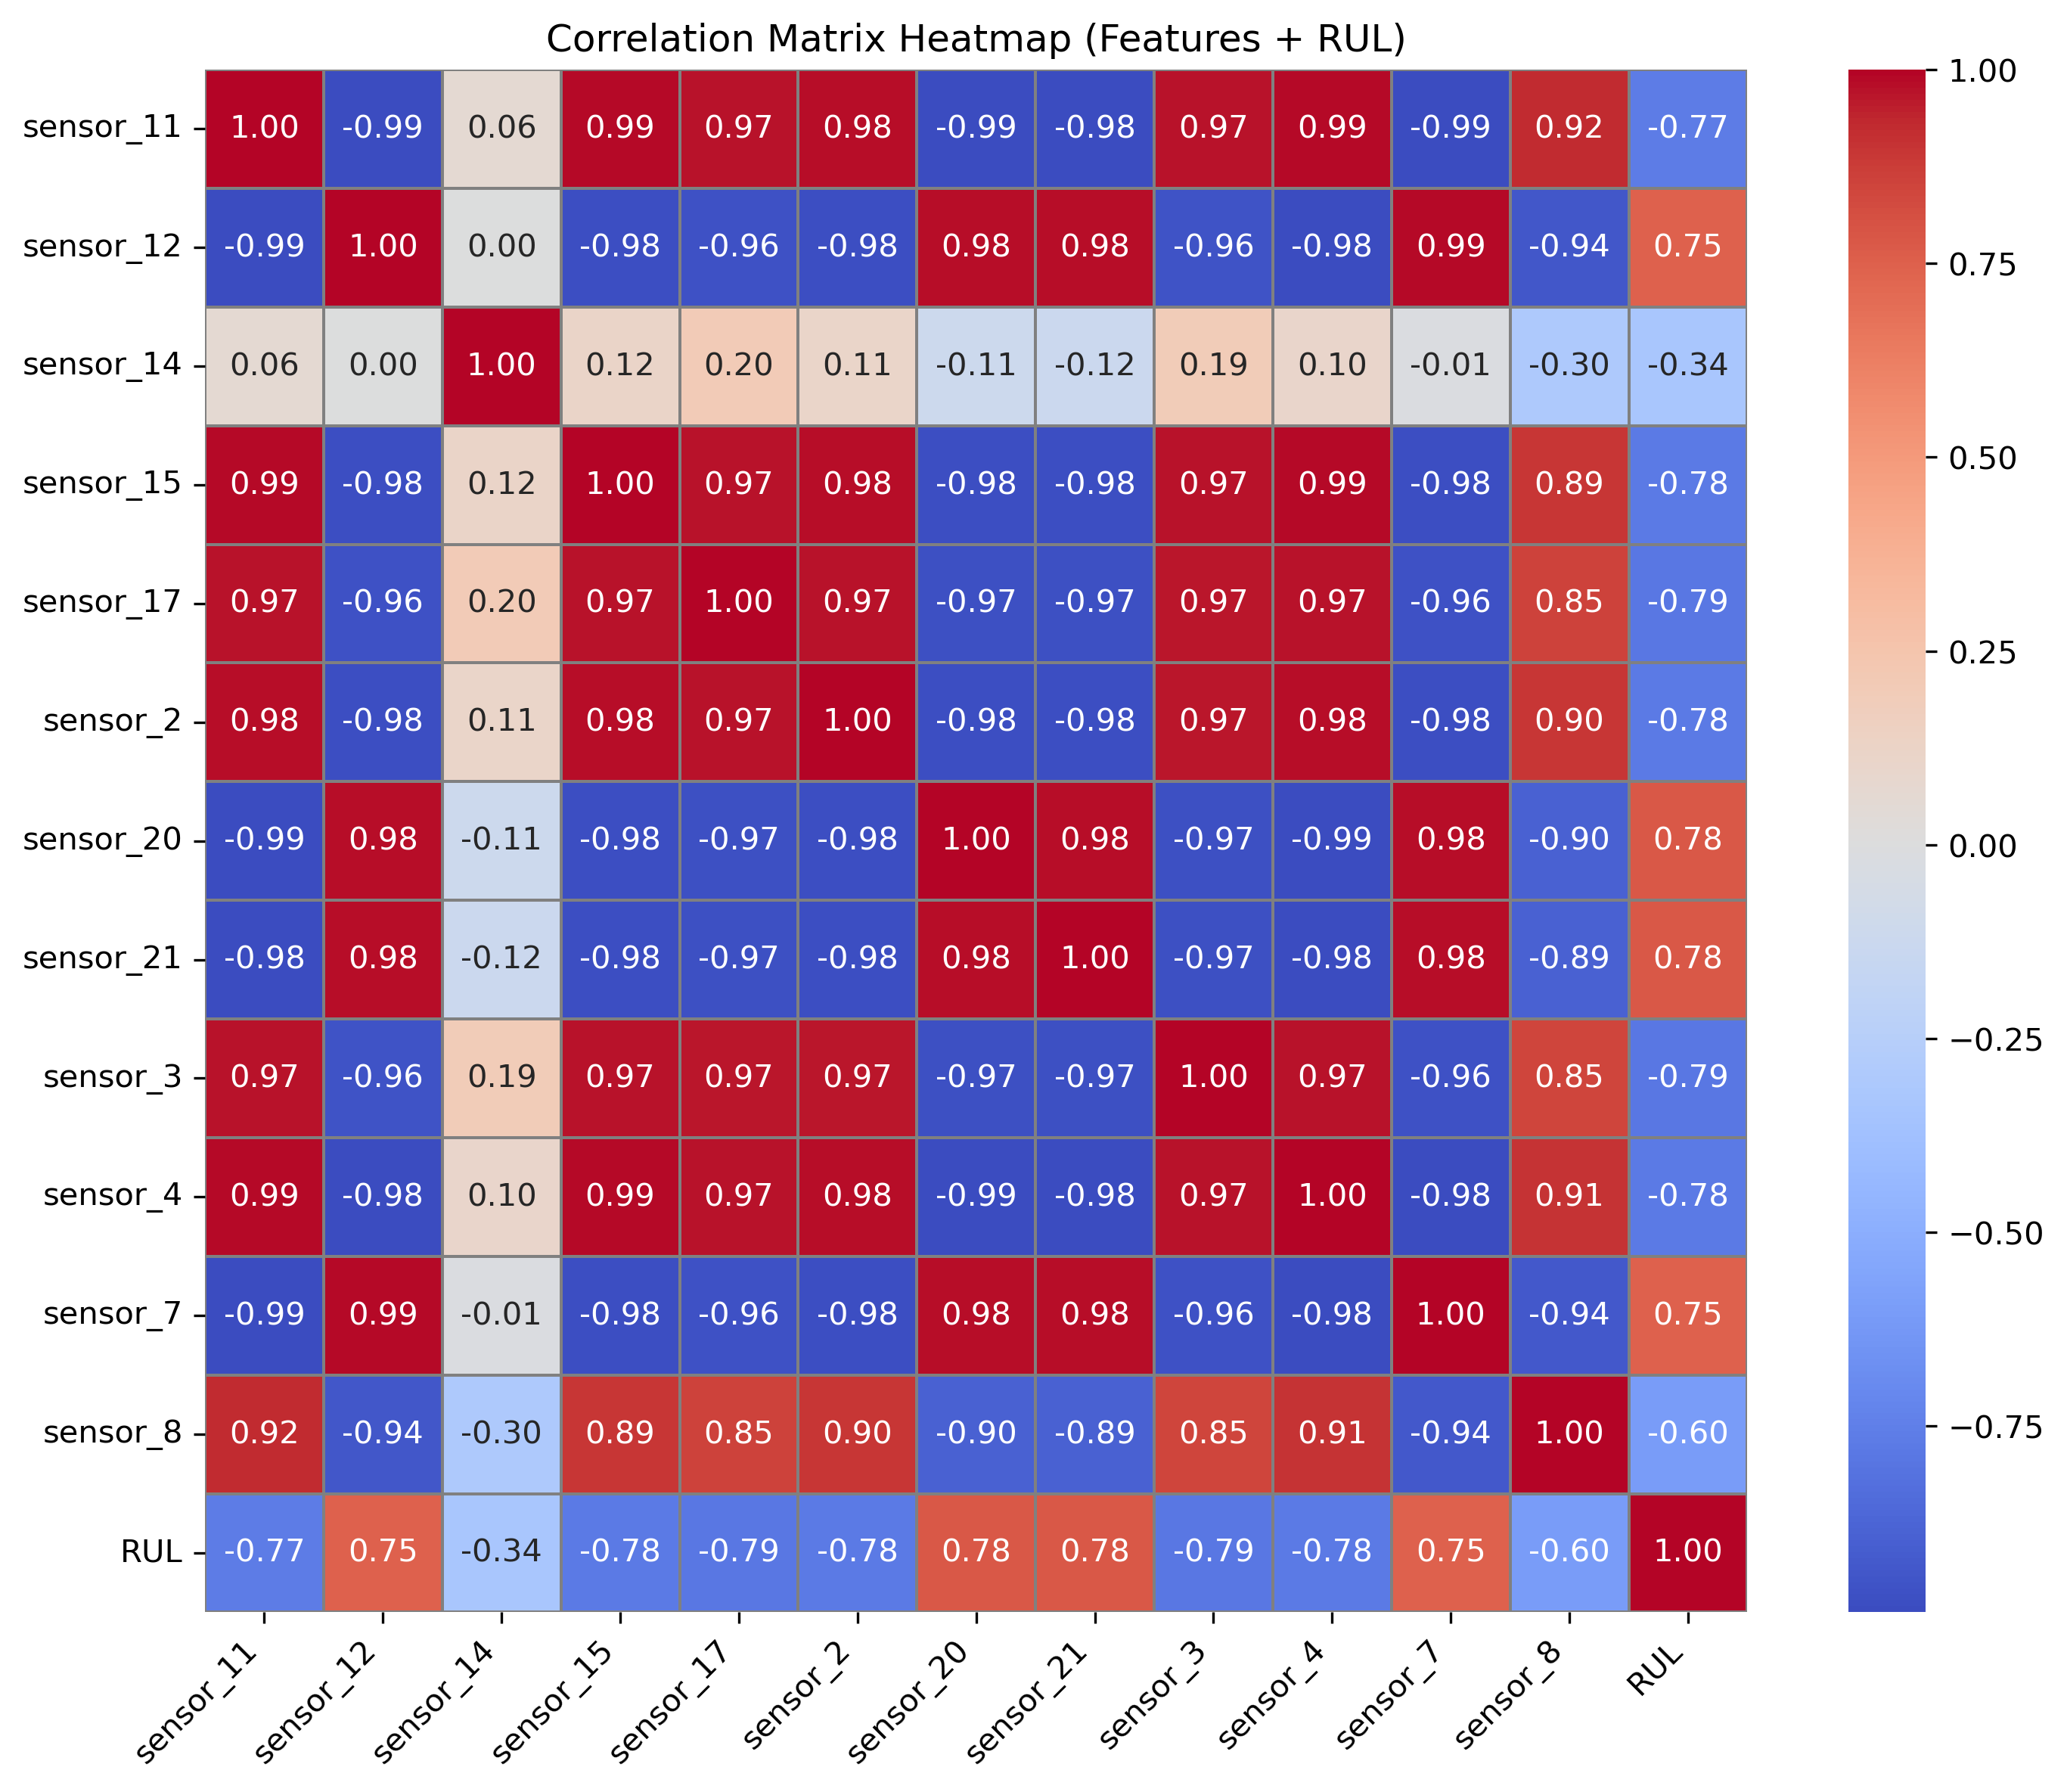

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert sliding window data into DataFrame (average per window)
X_flat = X_train.mean(axis=1)
X_flat_df = pd.DataFrame(X_flat, columns=train_df.columns.difference(['unit', 'time']))

# Add RUL as target
y_series = pd.Series(y_train, name='RUL')

# Combine features and target
corr_df = pd.concat([X_flat_df, y_series], axis=1)

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Extract and sort correlation with RUL
correlations_with_target = corr_matrix['RUL'].drop('RUL').sort_values(ascending=False)
print("Feature Correlation with Target (RUL):")
print(correlations_with_target)

# Plot heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8), dpi=300)
ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True,
                 cbar_kws={"shrink": 1.0, "aspect": 20},
                 linewidths=0.5, linecolor='gray')

plt.title("Correlation Matrix Heatmap (Features + RUL)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

plt.tight_layout()
plt.savefig(r'G:\Artificial_Intelligence\Tamrin\Tamrin5\Results\Heatmap_Correlation_Matrix.png')
plt.show()

### ***Step 1-5: Train/Test Split***

In [23]:
from sklearn.model_selection import train_test_split

# Split train set into train and validation
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.3, random_state=42
)

print("Final Training set shape:", X_train_final.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Final Training set shape: (12411, 30, 12)
Validation set shape: (5320, 30, 12)
Test set shape: (100, 30, 12)


### ***Step 1-6: Normalization of Data***

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Initialize Min-Max scaler on training data to avoid data leakage
scaler = MinMaxScaler()

# Reshape 3D data (samples, window_size, features) to 2D (total_timesteps, features)
num_samples, window_size, num_features = X_train_final.shape
X_train_2d = X_train_final.reshape(-1, num_features)
X_val_2d = X_val.reshape(-1, num_features)
X_test_2d = X_test.reshape(-1, num_features)

# Fit scaler only on training data
scaler.fit(X_train_2d)

# Transform train, validation, and test data
X_train_norm = scaler.transform(X_train_2d).reshape(num_samples, window_size, num_features)
X_val_norm = scaler.transform(X_val_2d).reshape(X_val.shape)
X_test_norm = scaler.transform(X_test_2d).reshape(X_test.shape)

print("Data normalized using Min-Max scaling to range [0, 1].")
print("Normalized data shapes:", X_train_norm.shape, X_val_norm.shape, X_test_norm.shape)

Data normalized using Min-Max scaling to range [0, 1].
Normalized data shapes: (12411, 30, 12) (5320, 30, 12) (100, 30, 12)


### ***Step 2: CNN Model***

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define input shape
input_shape = (X_train_norm.shape[1], X_train_norm.shape[2])

# Build the CNN model
model_cnn = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=input_shape),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer for RUL prediction
])

# Compile the CNN model
model_cnn.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.001),
    metrics=['mae']
)

model_cnn.summary()

E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 30, 64)         │         2,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 15, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 15, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,393 (138.25 KB)

 Trainable params: 35,393 (138.25 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Train the CNN model
import time

start_time = time.time()

history_cnn = model_cnn.fit(
    X_train_norm, y_train_final,
    validation_data=(X_val_norm, y_val),
    epochs=80,
    batch_size=32,
    verbose=1
)

# Calculate Training Time for CNN model
cnn_train_time = time.time() - start_time
print(f"Training time: {cnn_train_time:.2f} seconds")

Epoch 1/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - loss: 3183.2175 - mae: 44.2407 - val_loss: 663.7973 - val_mae: 20.6618
Epoch 2/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 710.5872 - mae: 21.4467 - val_loss: 564.2644 - val_mae: 18.9348
Epoch 3/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 645.6259 - mae: 20.1945 - val_loss: 540.8156 - val_mae: 18.8147
Epoch 4/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 622.1860 - mae: 19.7292 - val_loss: 535.8829 - val_mae: 18.1763
Epoch 5/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 617.7194 - mae: 19.7833 - val_loss: 541.5201 - val_mae: 19.2160
Epoch 6/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 616.0079 - mae: 19.7270 - val_loss: 542.7037 - val_mae: 19.2144
Epoch 7/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 607.4019 - mae: 19.4703 - val_loss: 489.6261 - val_mae: 17.6433
Epoch 8/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 561.4777 - mae: 18.6320 - val_loss: 472.0933 - val_mae: 17.341

### ***Step 3: LSTM Model***

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define Input shape
input_shape = (X_train_norm.shape[1], X_train_norm.shape[2])

# Build the LSTM model
model_lstm = Sequential([
    LSTM(100, return_sequences=True, input_shape=input_shape),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output RUL
])

# Compile the LSTM model
model_lstm.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.001),
    metrics=['mae']
)

model_lstm.summary()

E:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 100)        │        45,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         3,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 78,729 (307.54 KB)

 Trainable params: 78,729 (307.54 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Train the LSTM model
import time

start_time = time.time()

history_lstm = model_lstm.fit(
    X_train_norm, y_train_final,
    validation_data=(X_val_norm, y_val),
    epochs=80,
    batch_size=32,
    verbose=1
)

# Calculate Training Time for LSTM model
lstm_train_time = time.time() - start_time
print(f"Training time: {lstm_train_time:.2f} seconds")

Epoch 1/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 26s 50ms/step - loss: 4865.2803 - mae: 58.4926 - val_loss: 1875.2306 - val_mae: 38.4794
Epoch 2/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - loss: 1948.3365 - mae: 38.8953 - val_loss: 1871.6790 - val_mae: 38.3605
Epoch 3/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - loss: 1945.8549 - mae: 38.7561 - val_loss: 1871.6603 - val_mae: 38.3583
Epoch 4/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - loss: 1936.4957 - mae: 38.6770 - val_loss: 1873.0073 - val_mae: 38.4274
Epoch 5/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - loss: 1715.7943 - mae: 35.6612 - val_loss: 385.6100 - val_mae: 15.3468
Epoch 6/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - loss: 414.9987 - mae: 15.7391 - val_loss: 268.0282 - val_mae: 12.5979
Epoch 7/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - loss: 338.6491 - mae: 13.9991 - val_loss: 241.1191 - val_mae: 11.8204
Epoch 8/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - loss: 323.2582 - mae: 13.6280 - val_loss: 230.9780 - 

### ***Step 4: Hyperparameter Tuning***

### ***Step 4-1: Hyperparameter Tuning for CNN Model***

In [37]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

def build_cnn_model(hp):
    model = Sequential()
    model.add(Conv1D(
        filters=hp.Choice('filters1', [64, 128]),
        kernel_size=3,
        activation='relu',
        padding='same',
        input_shape=(X_train_norm.shape[1], X_train_norm.shape[2])
    ))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(
        filters=hp.Choice('filters2', [64, 128]),
        kernel_size=3,
        activation='relu',
        padding='same'
    ))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(hp.Choice('dense_units', [64, 128]), activation='relu'))
    model.add(Dropout(hp.Choice('dropout', [0.2, 0.3, 0.5])))
    model.add(Dense(1))

    optimizer_name = hp.Choice('optimizer', ['adam', 'rmsprop'])
    learning_rate = hp.Choice('lr', [1e-3, 5e-4, 1e-4])

    if optimizer_name == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    else:
        optimizer = RMSprop(learning_rate=learning_rate)

    model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    return model

In [39]:
tuner_cnn = kt.RandomSearch(
    build_cnn_model,
    objective='val_mae',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_results',
    project_name='cnn_rul_tuning'
)

tuner_cnn.search(
    X_train_norm, y_train_final,
    validation_data=(X_val_norm, y_val),
    epochs=30,
    batch_size=32,
    verbose=1
)

cnn_trials = tuner_cnn.oracle.get_best_trials(num_trials=10)

print("\n Summary of All CNN Tuning Trials:\n")
for i, trial in enumerate(cnn_trials):
    print(f"Trial {i+1}:")
    print(f"  Score (val_mae): {trial.score:.4f}")
    print("  Hyperparameters:")
    for name, value in trial.hyperparameters.values.items():
        print(f"    - {name}: {value}")
    print("-" * 40)

Trial 10 Complete [00h 01m 42s]
val_mae: 17.903419494628906

Best val_mae So Far: 12.019194602966309
Total elapsed time: 00h 17m 06s

 Summary of All CNN Tuning Trials:

Trial 1:
  Score (val_mae): 12.0192
  Hyperparameters:
    - filters1: 128
    - filters2: 128
    - dense_units: 128
    - dropout: 0.5
    - optimizer: adam
    - lr: 0.001
----------------------------------------
Trial 2:
  Score (val_mae): 12.0911
  Hyperparameters:
    - filters1: 128
    - filters2: 128
    - dense_units: 128
    - dropout: 0.3
    - optimizer: rmsprop
    - lr: 0.001
----------------------------------------
Trial 3:
  Score (val_mae): 12.6621
  Hyperparameters:
    - filters1: 128
    - filters2: 128
    - dense_units: 128
    - dropout: 0.5
    - optimizer: rmsprop
    - lr: 0.001
----------------------------------------
Trial 4:
  Score (val_mae): 12.8410
  Hyperparameters:
    - filters1: 64
    - filters2: 128
    - dense_units: 64
    - dropout: 0.5
    - optimizer: adam
    - lr: 0.001
---

In [41]:
best_cnn_model = tuner_cnn.get_best_models(1)[0]
best_cnn_hyperparams = tuner_cnn.get_best_hyperparameters(1)[0]

print("Best CNN hyperparameters found:")
for param, val in best_cnn_hyperparams.values.items():
    print(f"  - {param}: {val}")

E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best CNN hyperparameters found:
  - filters1: 128
  - filters2: 128
  - dense_units: 128
  - dropout: 0.5
  - optimizer: adam
  - lr: 0.001


E:\Anaconda\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


### ***Step 4-2: Hyperparameter Tuning for LSTM Model***

In [43]:
def build_lstm_model(hp):
    model = Sequential()
    model.add(LSTM(
        units=hp.Choice('lstm_units1', [64, 100, 128]),
        return_sequences=True,
        input_shape=(X_train_norm.shape[1], X_train_norm.shape[2])
    ))
    model.add(Dropout(hp.Choice('dropout1', [0.2, 0.3, 0.5])))
    model.add(LSTM(
        units=hp.Choice('lstm_units2', [32, 50, 64]),
        return_sequences=False
    ))
    model.add(Dense(hp.Choice('dense_units', [64, 128]), activation='relu'))
    model.add(Dropout(hp.Choice('dropout2', [0.2, 0.3, 0.5])))
    model.add(Dense(1))

    optimizer_name = hp.Choice('optimizer', ['adam', 'rmsprop'])
    learning_rate = hp.Choice('lr', [1e-3, 5e-4, 1e-4])

    if optimizer_name == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    else:
        optimizer = RMSprop(learning_rate=learning_rate)

    model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    return model

In [45]:
tuner_lstm = kt.RandomSearch(
    build_lstm_model,
    objective='val_mae',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_results',
    project_name='lstm_rul_tuning'
)

tuner_lstm.search(
    X_train_norm, y_train_final,
    validation_data=(X_val_norm, y_val),
    epochs=30,
    batch_size=32,
    verbose=1
)

lstm_trials = tuner_lstm.oracle.get_best_trials(num_trials=10)

print("\n Summary of All LSTM Tuning Trials:\n")
for i, trial in enumerate(lstm_trials):
    print(f"Trial {i+1}:")
    print(f"  Score (val_mae): {trial.score:.4f}")
    print("  Hyperparameters:")
    for name, value in trial.hyperparameters.values.items():
        print(f"    - {name}: {value}")
    print("-" * 40)

Trial 10 Complete [00h 08m 12s]
val_mae: 9.93221664428711

Best val_mae So Far: 9.836679458618164
Total elapsed time: 01h 25m 37s

 Summary of All LSTM Tuning Trials:

Trial 1:
  Score (val_mae): 9.8367
  Hyperparameters:
    - lstm_units1: 64
    - dropout1: 0.5
    - lstm_units2: 50
    - dense_units: 128
    - dropout2: 0.3
    - optimizer: rmsprop
    - lr: 0.001
----------------------------------------
Trial 2:
  Score (val_mae): 9.9322
  Hyperparameters:
    - lstm_units1: 100
    - dropout1: 0.2
    - lstm_units2: 32
    - dense_units: 64
    - dropout2: 0.2
    - optimizer: rmsprop
    - lr: 0.001
----------------------------------------
Trial 3:
  Score (val_mae): 10.0753
  Hyperparameters:
    - lstm_units1: 100
    - dropout1: 0.2
    - lstm_units2: 50
    - dense_units: 64
    - dropout2: 0.3
    - optimizer: rmsprop
    - lr: 0.001
----------------------------------------
Trial 4:
  Score (val_mae): 10.2310
  Hyperparameters:
    - lstm_units1: 128
    - dropout1: 0.5
    

In [51]:
best_lstm_model = tuner_lstm.get_best_models(1)[0]
best_lstm_hyperparams = tuner_lstm.get_best_hyperparameters(1)[0]

print("Best LSTM hyperparameters found:")
for param, val in best_lstm_hyperparams.values.items():
    print(f"  - {param}: {val}")

Best LSTM hyperparameters found:
  - lstm_units1: 64
  - dropout1: 0.5
  - lstm_units2: 50
  - dense_units: 128
  - dropout2: 0.3
  - optimizer: rmsprop
  - lr: 0.001


E:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
E:\Anaconda\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


### ***Step 5-1: CNN + LSTM Model***

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense

# Define Input shape
input_shape = (X_train_norm.shape[1], X_train_norm.shape[2])

# Build the CNN + LSTM model
model_cnn_lstm = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=input_shape),
    MaxPooling1D(pool_size=2),
    LSTM(100, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)  # Output: RUL
])

# Compile the CNN + LSTM model
model_cnn_lstm.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

model_cnn_lstm.summary()

E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 30, 64)         │         2,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 15, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100)            │        66,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,897 (292.57 KB)

 Trainable params: 74,897 (292.57 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
# Train the CNN + LSTM model
import time

start_time = time.time()

history_cnn_lstm = model_cnn_lstm.fit(
    X_train_norm, y_train_final,
    validation_data=(X_val_norm, y_val),
    epochs=80,
    batch_size=32,
    verbose=1
)

# Calculate Training Time for CNN + LSTM model
cnn_lstm_train_time = time.time() - start_time
print(f"Training time: {cnn_lstm_train_time:.2f} seconds")

Epoch 1/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - loss: 3679.0454 - mae: 50.3810 - val_loss: 485.7569 - val_mae: 17.6332
Epoch 2/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 491.1156 - mae: 17.3701 - val_loss: 429.8378 - val_mae: 16.4801
Epoch 3/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 414.0626 - mae: 15.8047 - val_loss: 275.8901 - val_mae: 12.5532
Epoch 4/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 304.2202 - mae: 13.3833 - val_loss: 234.9525 - val_mae: 11.5884
Epoch 5/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 268.8356 - mae: 12.4104 - val_loss: 230.3999 - val_mae: 11.1078
Epoch 6/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 256.1788 - mae: 12.0092 - val_loss: 232.8204 - val_mae: 11.3177
Epoch 7/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 252.3745 - mae: 11.9182 - val_loss: 237.6023 - val_mae: 11.6881
Epoch 8/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 253.5118 - mae: 11.9289 - val_loss: 224.4543 - val_mae: 11.042

### ***Step 5-2: LSTM + CNN Model***

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D, Dropout, Dense, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam

# Define Input shape
input_shape = (X_train_norm.shape[1], X_train_norm.shape[2])

# Build the LSTM + CNN model
model_lstm_cnn = Sequential([
    LSTM(100, return_sequences=True, input_shape=input_shape),
    Dropout(0.3),
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(1)  # Output: RUL
])

# Compile the LSTM + CNN model
model_lstm_cnn.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

model_lstm_cnn.summary()

E:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 30, 100)        │        45,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 30, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 30, 64)         │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 15, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,689 (268.32 KB)

 Trainable params: 68,689 (268.32 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
# Train the LSTM + CNN model
import time

start_time = time.time()

history_lstm_cnn = model_lstm_cnn.fit(
    X_train_norm, y_train_final,
    validation_data=(X_val_norm, y_val),
    epochs=80,
    batch_size=32,
    verbose=1
)

# Calculate Training Time for LSTM + CNN model
lstm_cnn_train_time = time.time() - start_time
print(f"Training time: {lstm_cnn_train_time:.2f} seconds")

Epoch 1/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - loss: 3151.5867 - mae: 45.9994 - val_loss: 736.8745 - val_mae: 22.1538
Epoch 2/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 717.0853 - mae: 21.3682 - val_loss: 550.0607 - val_mae: 19.6563
Epoch 3/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - loss: 458.7962 - mae: 16.7475 - val_loss: 345.5847 - val_mae: 14.5745
Epoch 4/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - loss: 355.3833 - mae: 14.5635 - val_loss: 330.6314 - val_mae: 14.1020
Epoch 5/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 319.9796 - mae: 13.7471 - val_loss: 348.3117 - val_mae: 14.9288
Epoch 6/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 294.1199 - mae: 13.1162 - val_loss: 385.4669 - val_mae: 14.2452
Epoch 7/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - loss: 278.9383 - mae: 12.6357 - val_loss: 260.0294 - val_mae: 12.3424
Epoch 8/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 263.6378 - mae: 12.3088 - val_loss: 257.1704 - val_mae:

### ***Step 6: LSTM + Attention Model***

In [61]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

# Custom Attention Layer
class Attention(Layer):
    def __init__(self):
        super(Attention, self).__init__()

    def call(self, inputs):
        # inputs.shape = (batch_size, time_steps, features)
        score = tf.nn.softmax(tf.keras.backend.sum(inputs, axis=-1, keepdims=True), axis=1)
        context = tf.reduce_sum(score * inputs, axis=1)
        return context

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define Input shape
input_shape = (X_train_norm.shape[1], X_train_norm.shape[2])

# Build the LSTM + Attention model
model_lstm_att = Sequential([
    LSTM(100, return_sequences=True, input_shape=input_shape),
    Attention(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)  # Output: RUL
])

# Compile the LSTM + Attention model
model_lstm_att.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

model_lstm_att.summary()

E:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 30, 100)        │        45,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention (Attention)           │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,729 (202.07 KB)

 Trainable params: 51,729 (202.07 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
# Train the LSTM + Attention model
import time

start_time = time.time()

history_lstm_att = model_lstm_att.fit(
    X_train_norm, y_train_final,
    validation_data=(X_val_norm, y_val),
    epochs=80,
    batch_size=32,
    verbose=1
)

# Calculate Training Time for LSTM + Attention model
lstm_att_train_time = time.time() - start_time
print(f"Training time: {lstm_att_train_time:.2f} seconds")

Epoch 1/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 3644.3328 - mae: 49.8502 - val_loss: 805.2368 - val_mae: 23.4251
Epoch 2/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 868.6371 - mae: 23.6972 - val_loss: 828.1637 - val_mae: 23.4675
Epoch 3/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 761.1872 - mae: 22.2626 - val_loss: 543.6028 - val_mae: 18.8553
Epoch 4/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 517.3216 - mae: 17.8064 - val_loss: 402.0876 - val_mae: 15.5387
Epoch 5/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 414.7916 - mae: 15.6785 - val_loss: 417.8817 - val_mae: 15.2793
Epoch 6/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 335.3123 - mae: 14.0675 - val_loss: 307.5670 - val_mae: 13.0967
Epoch 7/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 306.7782 - mae: 13.4016 - val_loss: 263.3540 - val_mae: 12.3328
Epoch 8/80
388/388 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 297.8628 - mae: 13.2171 - val_loss: 268.8639 - val_mae: 

### **Part B: Evaluation of Models performance**

### ***Step 1: Plots and Visual Comparison***

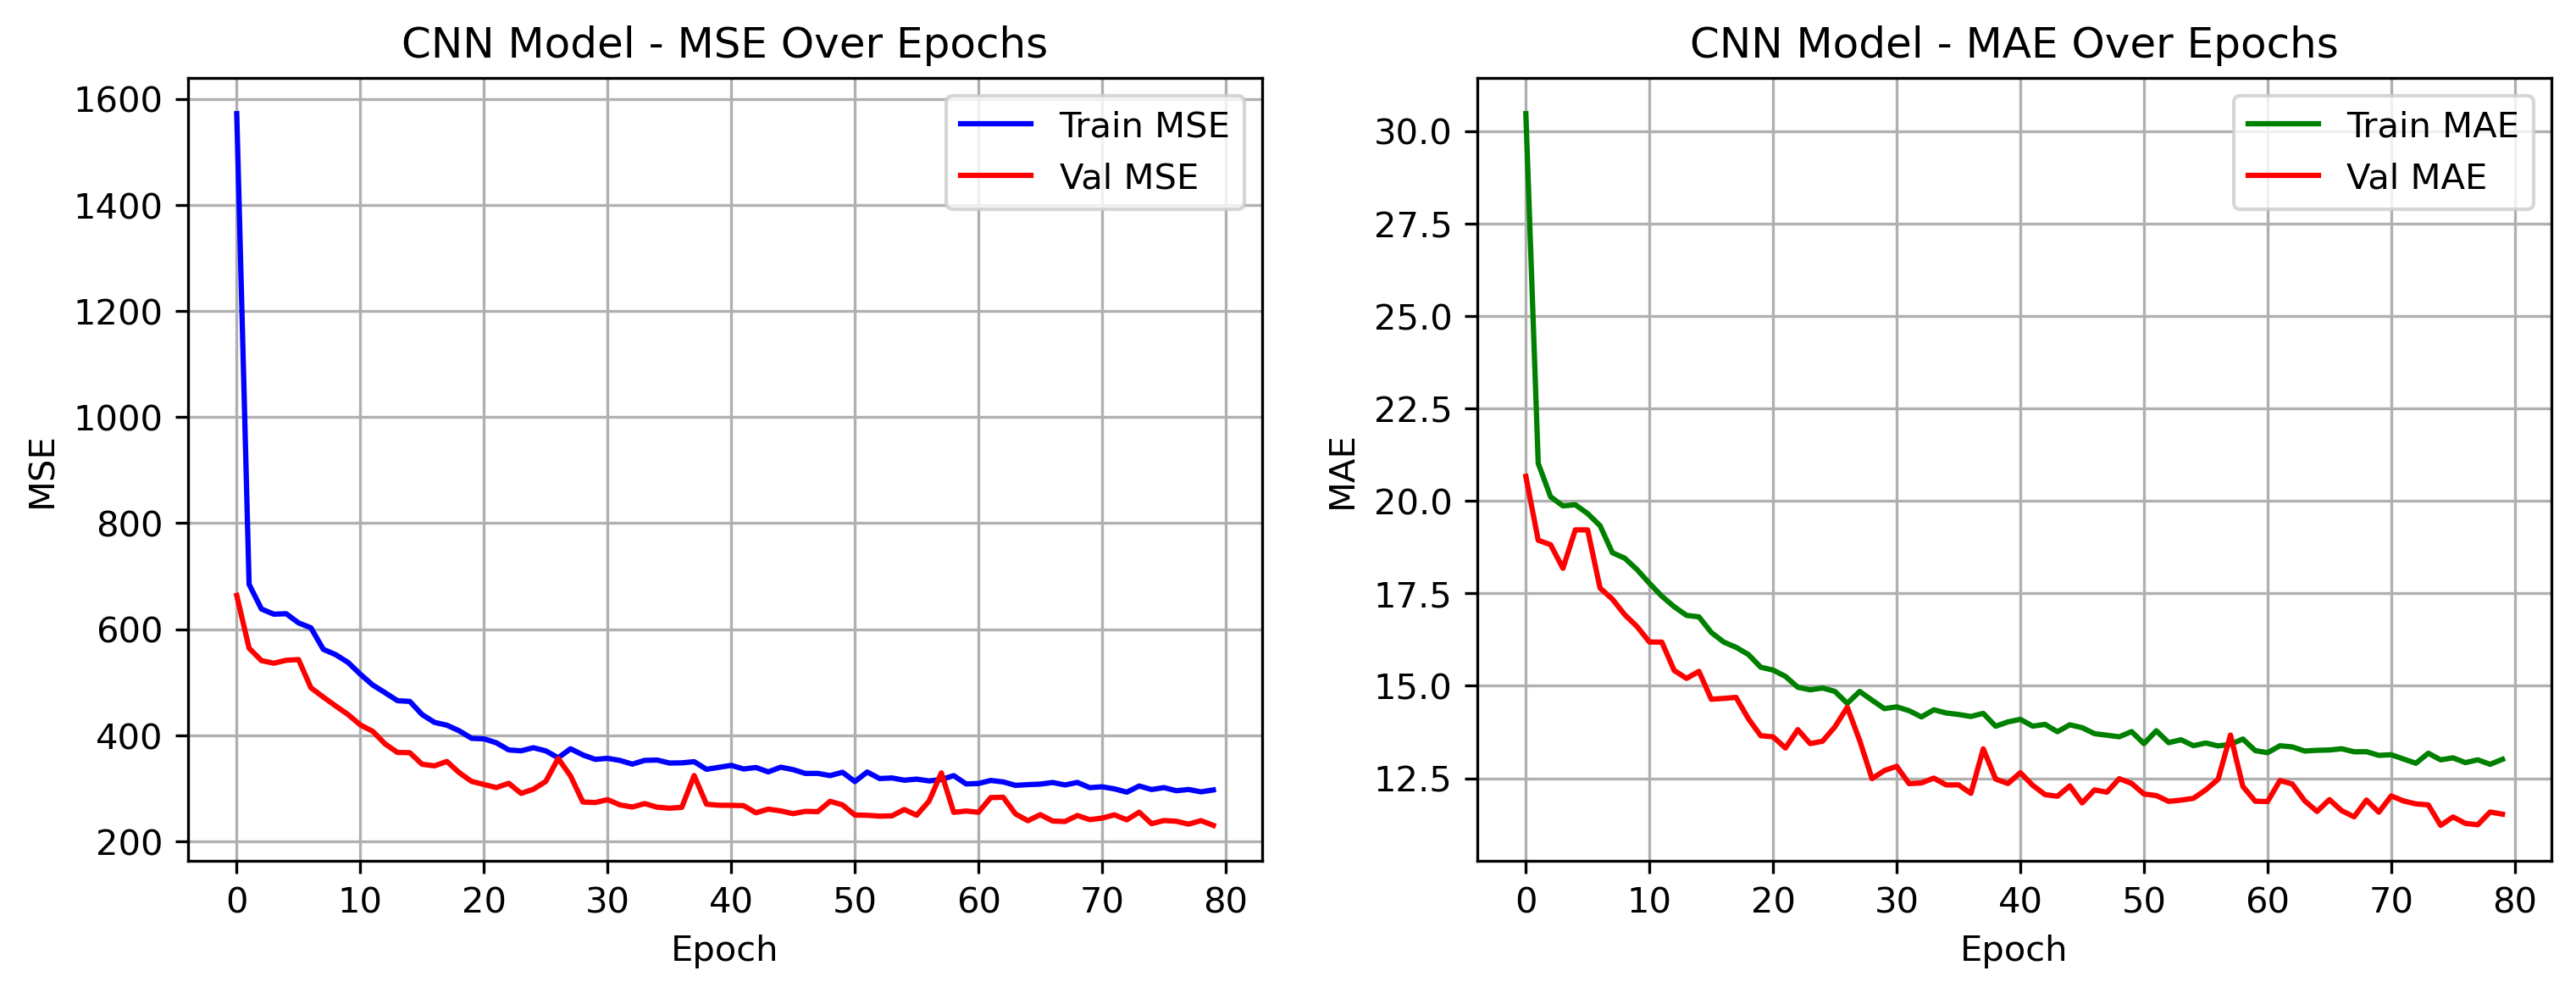

In [67]:
# Plot MSE (Mean Squared Error) & MAE (Mean Absolute Error) over epochs for CNN model

plt.figure(figsize=(12, 4), dpi=300)

# MSE
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'], label='Train MSE', color='blue')
plt.plot(history_cnn.history['val_loss'], label='Val MSE', color='red')
plt.title('CNN Model - MSE Over Epochs', fontsize=12)
plt.xlabel('Epoch', fontsize=10)
plt.ylabel('MSE', fontsize=10)
plt.legend()
plt.grid(True)

# MAE
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['mae'], label='Train MAE', color='green')
plt.plot(history_cnn.history['val_mae'], label='Val MAE', color='red')
plt.title('CNN Model - MAE Over Epochs', fontsize=12)
plt.xlabel('Epoch', fontsize=10)
plt.ylabel('MAE', fontsize=10)
plt.legend()
plt.grid(True)

plt.subplots_adjust(wspace=0.2)
plt.savefig(r'G:\Artificial_Intelligence\Tamrin\Tamrin5\Results\MSE&MAE_CNN.png')
plt.show()

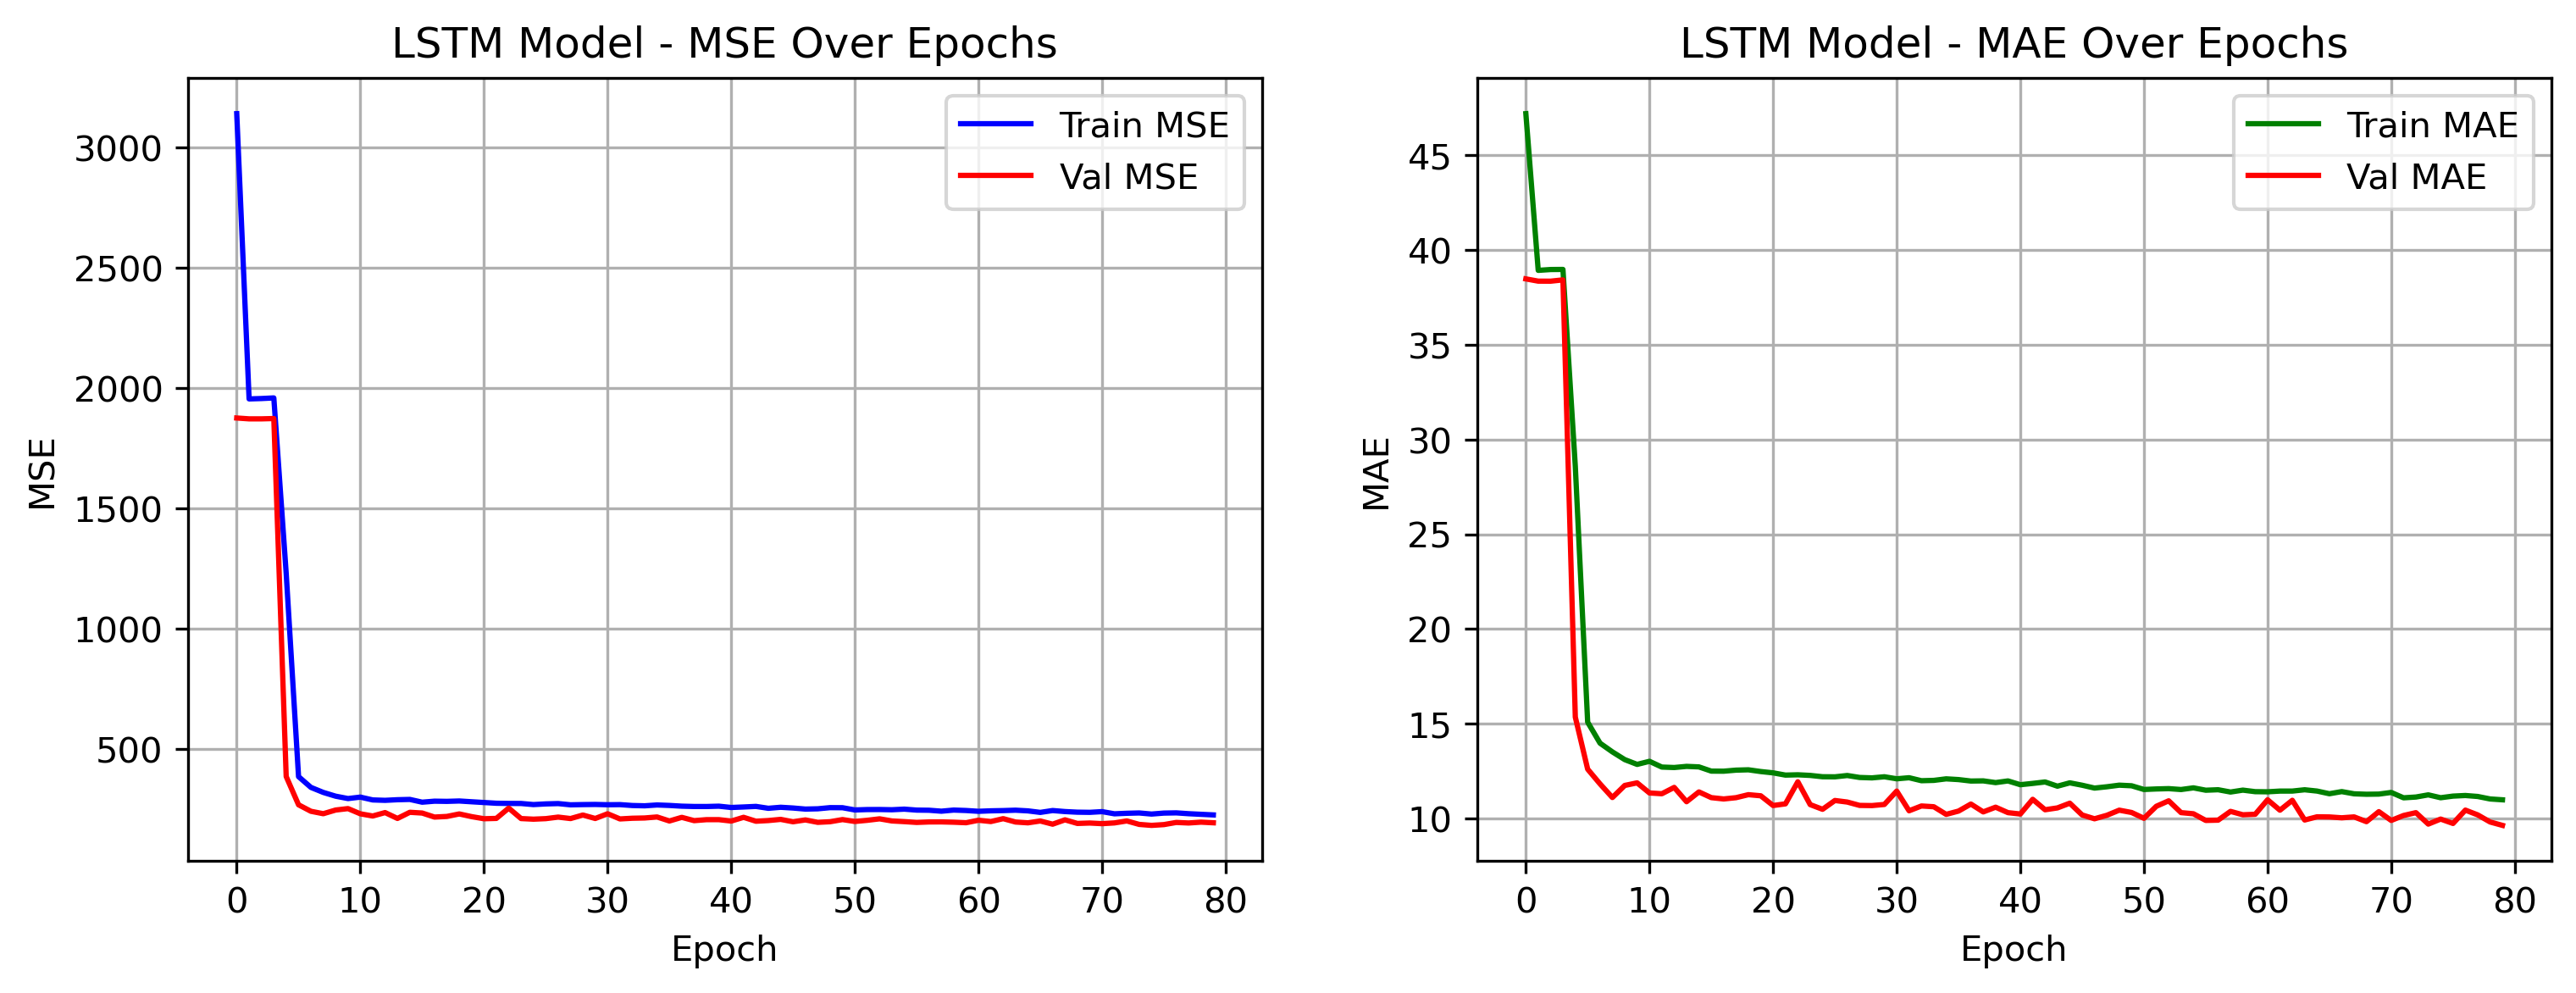

In [69]:
# Plot MSE (Mean Squared Error) & MAE (Mean Absolute Error) over epochs for LSTM model

plt.figure(figsize=(12, 4), dpi=300)

# MSE
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='Train MSE', color='blue')
plt.plot(history_lstm.history['val_loss'], label='Val MSE', color='red')
plt.title('LSTM Model - MSE Over Epochs', fontsize=12)
plt.xlabel('Epoch', fontsize=10)
plt.ylabel('MSE', fontsize=10)
plt.legend()
plt.grid(True)

# MAE
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['mae'], label='Train MAE', color='green')
plt.plot(history_lstm.history['val_mae'], label='Val MAE', color='red')
plt.title('LSTM Model - MAE Over Epochs', fontsize=12)
plt.xlabel('Epoch', fontsize=10)
plt.ylabel('MAE', fontsize=10)
plt.legend()
plt.grid(True)

plt.subplots_adjust(wspace=0.2)
plt.savefig(r'G:\Artificial_Intelligence\Tamrin\Tamrin5\Results\MSE&MAE_LSTM.png')
plt.show()

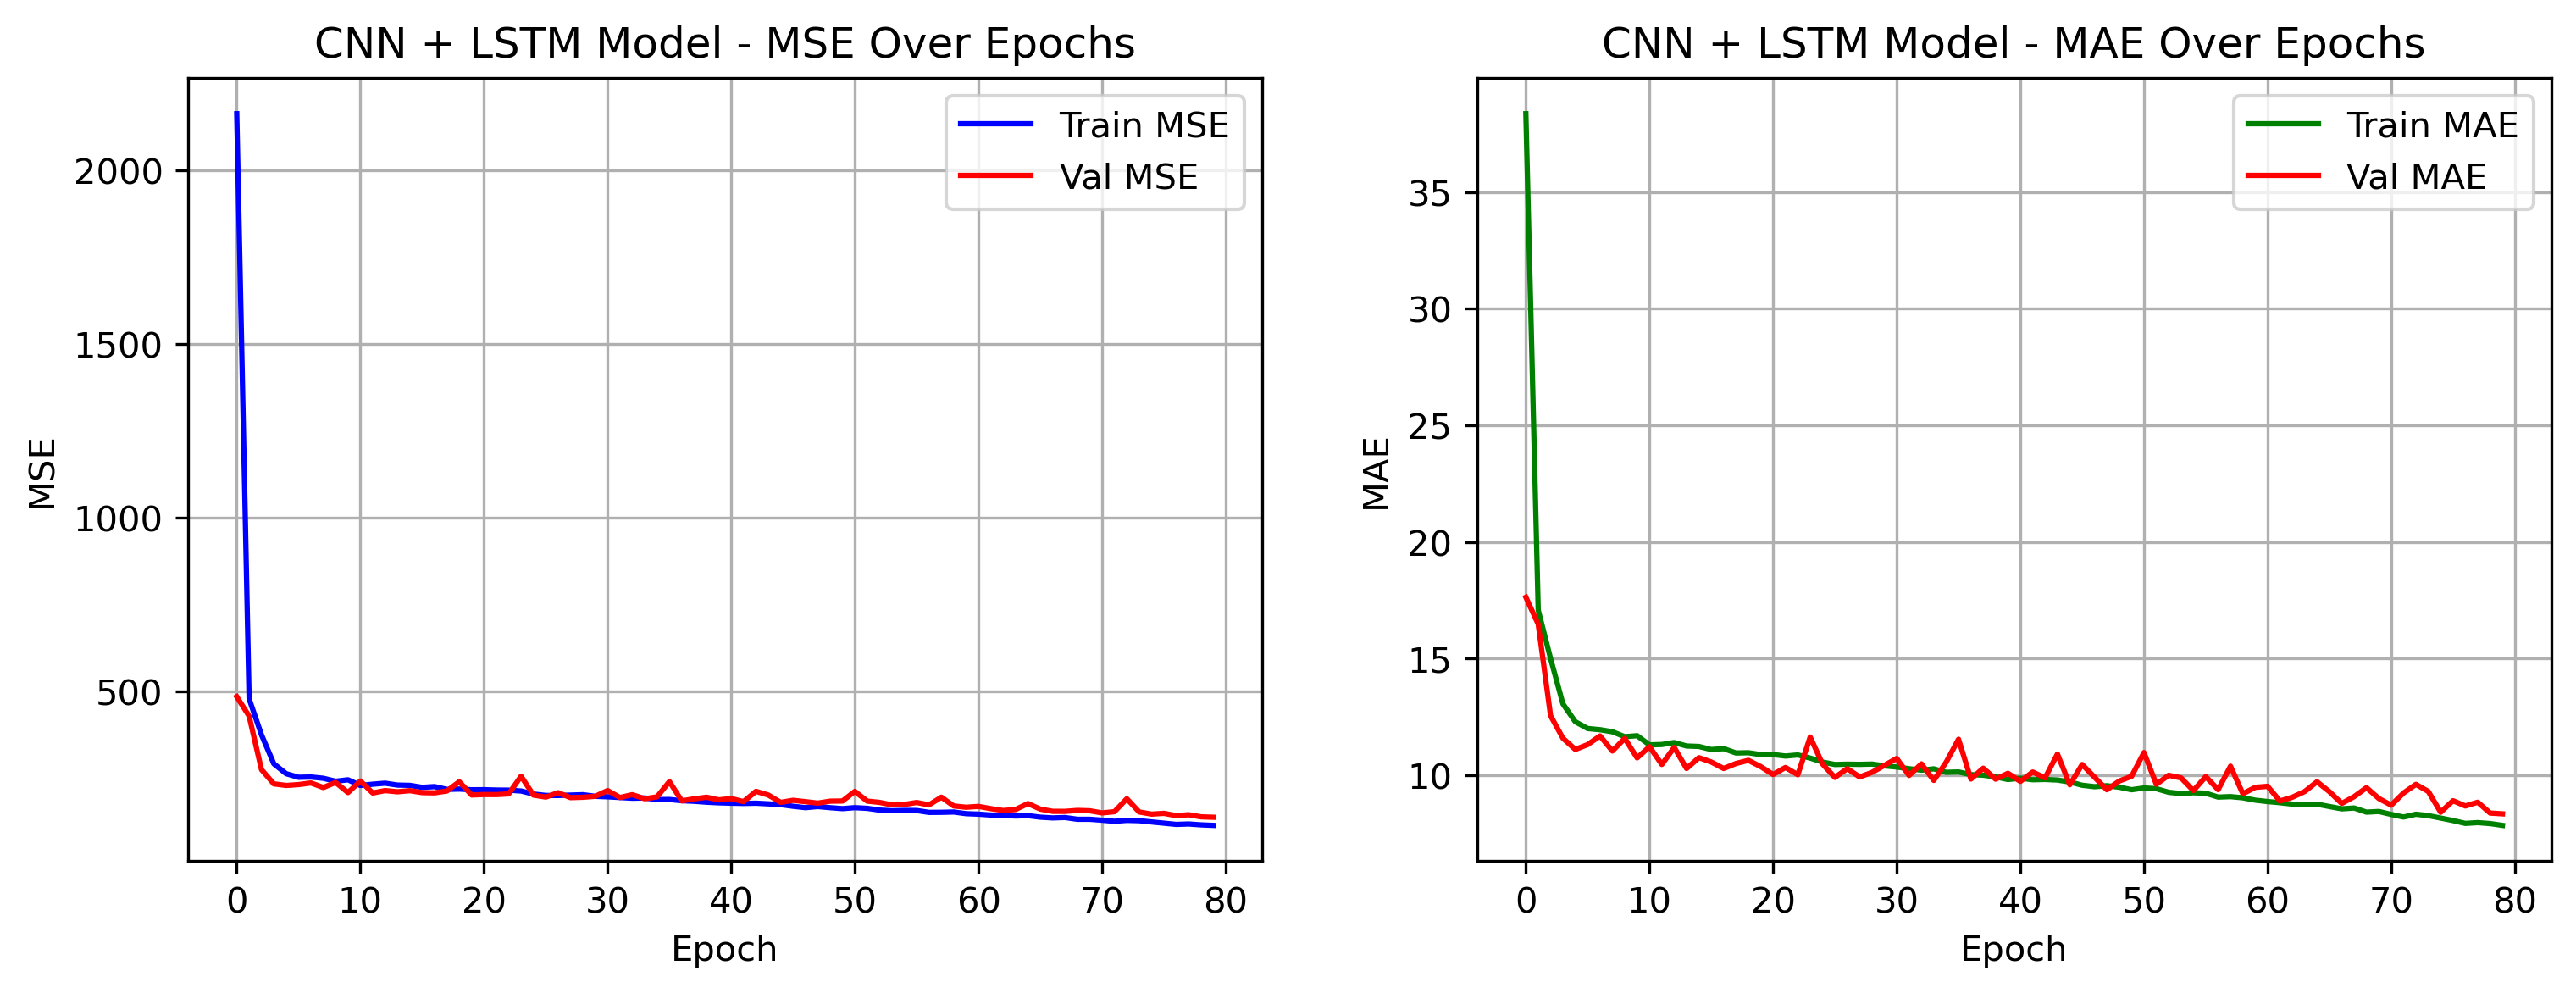

In [71]:
# Plot MSE (Mean Squared Error) & MAE (Mean Absolute Error) over epochs for CNN + LSTM model

plt.figure(figsize=(12, 4), dpi=300)

# MSE
plt.subplot(1, 2, 1)
plt.plot(history_cnn_lstm.history['loss'], label='Train MSE', color='blue')
plt.plot(history_cnn_lstm.history['val_loss'], label='Val MSE', color='red')
plt.title('CNN + LSTM Model - MSE Over Epochs', fontsize=12)
plt.xlabel('Epoch', fontsize=10)
plt.ylabel('MSE', fontsize=10)
plt.legend()
plt.grid(True)

# MAE
plt.subplot(1, 2, 2)
plt.plot(history_cnn_lstm.history['mae'], label='Train MAE', color='green')
plt.plot(history_cnn_lstm.history['val_mae'], label='Val MAE', color='red')
plt.title('CNN + LSTM Model - MAE Over Epochs', fontsize=12)
plt.xlabel('Epoch', fontsize=10)
plt.ylabel('MAE', fontsize=10)
plt.legend()
plt.grid(True)

plt.subplots_adjust(wspace=0.2)
plt.savefig(r'G:\Artificial_Intelligence\Tamrin\Tamrin5\Results\MSE&MAE_CNN+LSTM.png')
plt.show()

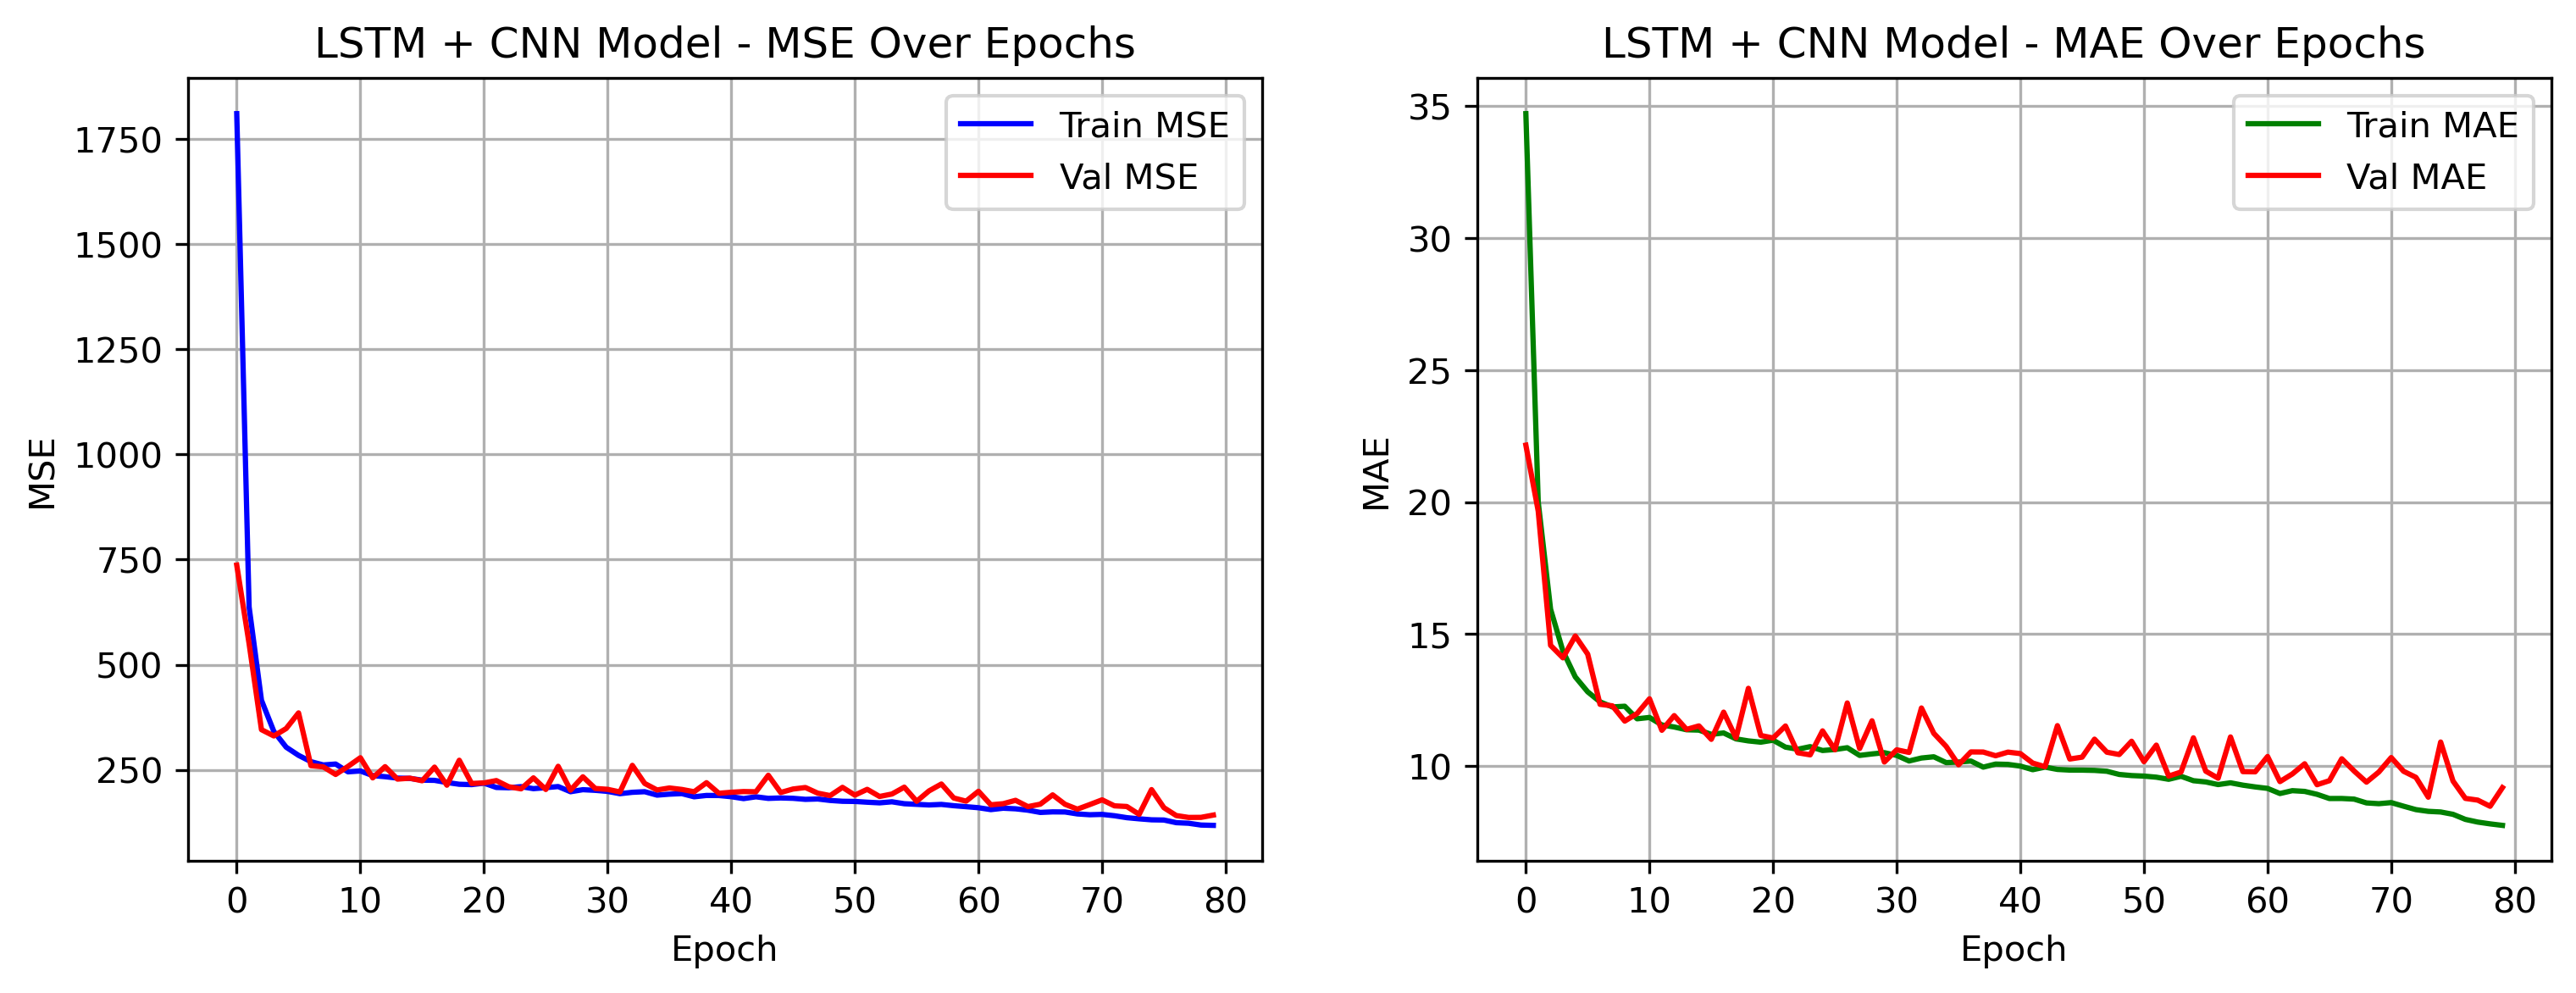

In [73]:
# Plot MSE (Mean Squared Error) & MAE (Mean Absolute Error) over epochs for LSTM + CNN model

plt.figure(figsize=(12, 4), dpi=300)

# MSE
plt.subplot(1, 2, 1)
plt.plot(history_lstm_cnn.history['loss'], label='Train MSE', color='blue')
plt.plot(history_lstm_cnn.history['val_loss'], label='Val MSE', color='red')
plt.title('LSTM + CNN Model - MSE Over Epochs', fontsize=12)
plt.xlabel('Epoch', fontsize=10)
plt.ylabel('MSE', fontsize=10)
plt.legend()
plt.grid(True)

# MAE
plt.subplot(1, 2, 2)
plt.plot(history_lstm_cnn.history['mae'], label='Train MAE', color='green')
plt.plot(history_lstm_cnn.history['val_mae'], label='Val MAE', color='red')
plt.title('LSTM + CNN Model - MAE Over Epochs', fontsize=12)
plt.xlabel('Epoch', fontsize=10)
plt.ylabel('MAE', fontsize=10)
plt.legend()
plt.grid(True)

plt.subplots_adjust(wspace=0.2)
plt.savefig(r'G:\Artificial_Intelligence\Tamrin\Tamrin5\Results\MSE&MAE_LSTM+CNN.png')
plt.show()

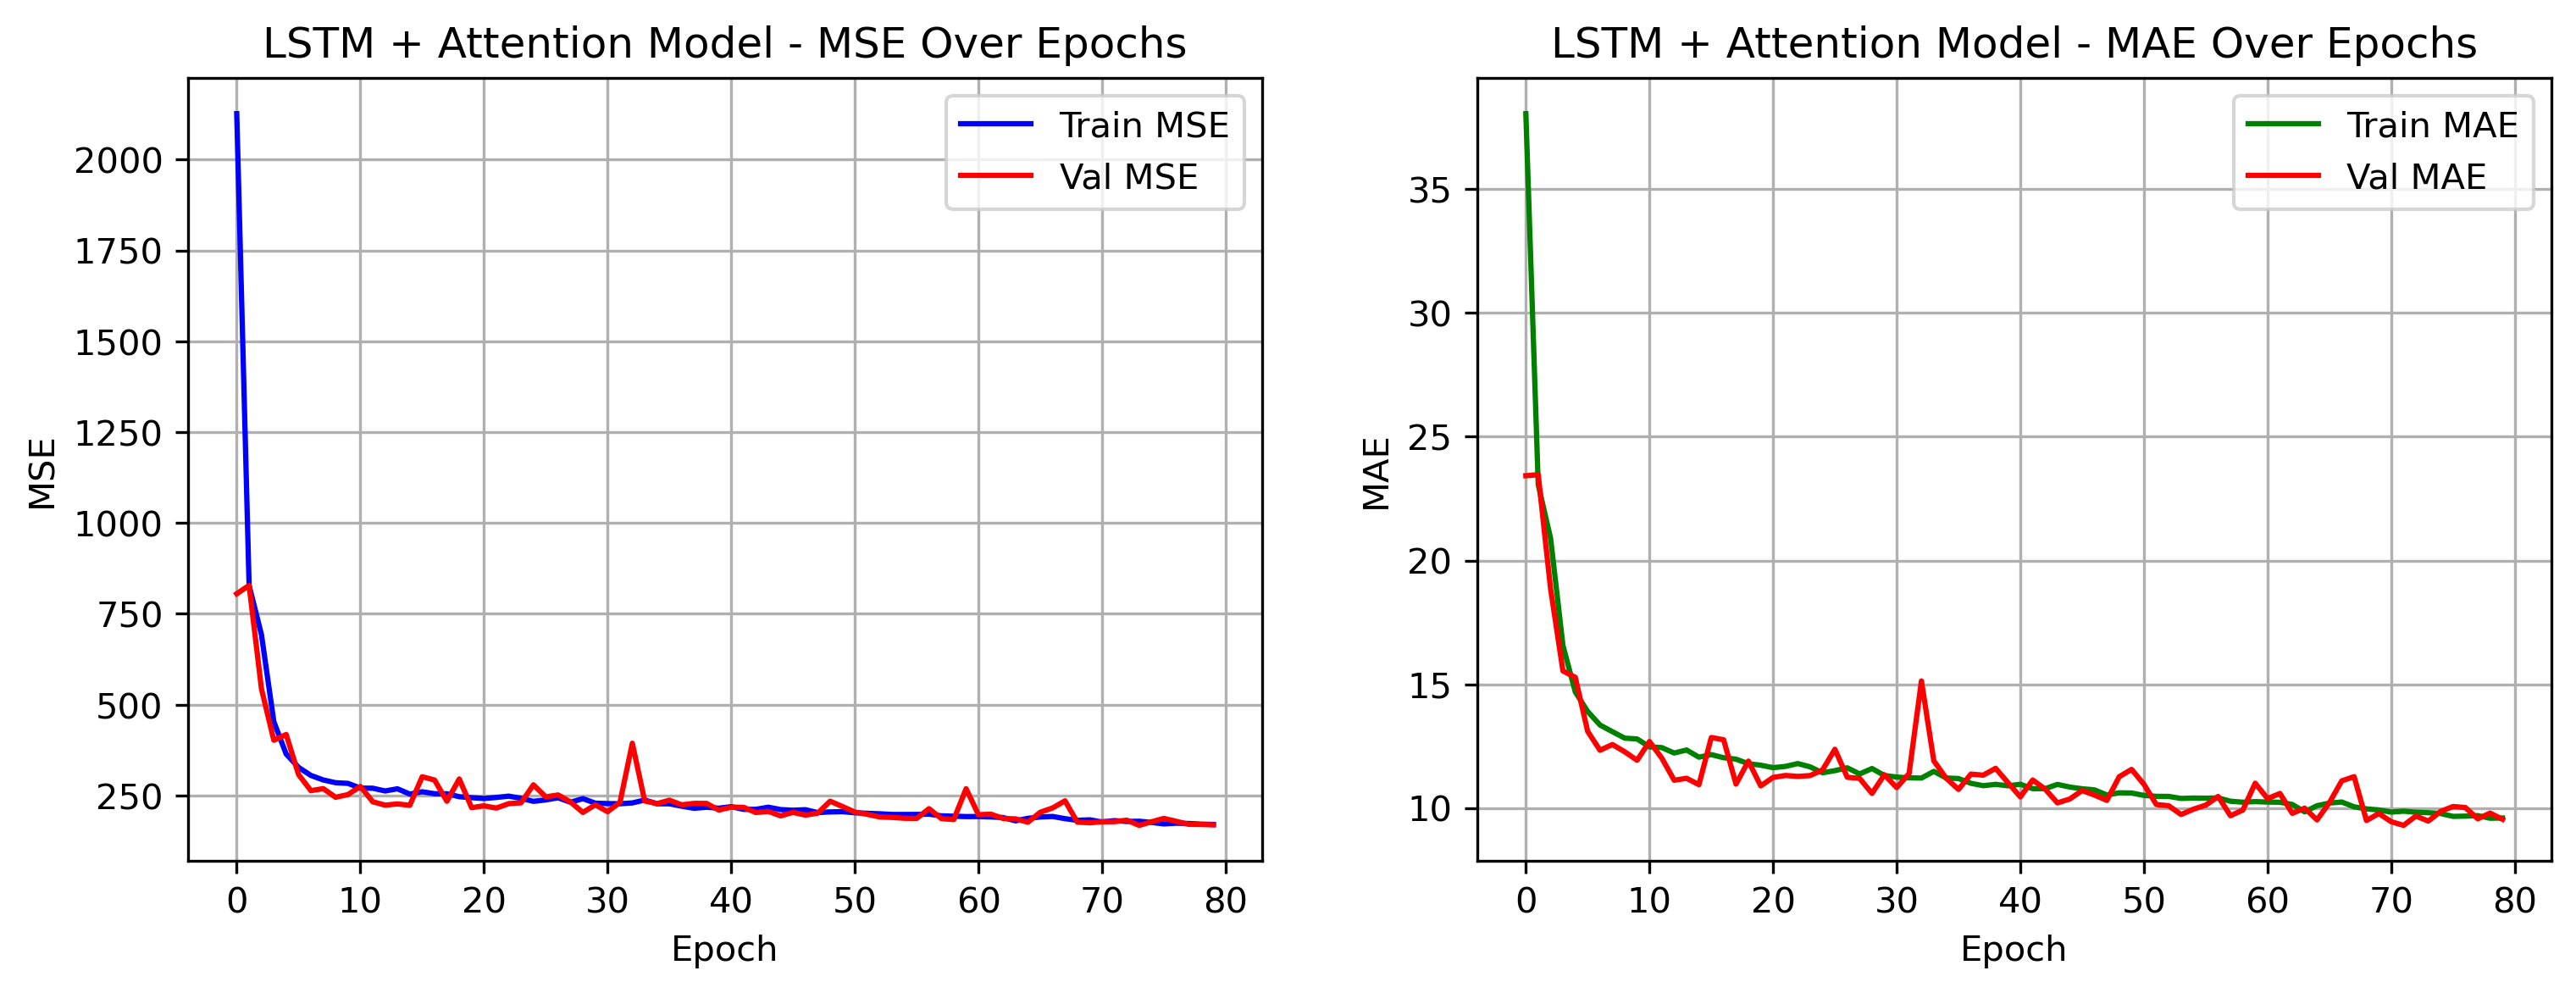

In [75]:
# Plot MSE (Mean Squared Error) & MAE (Mean Absolute Error) over epochs for LSTM + Attention model

plt.figure(figsize=(12, 4), dpi=300)

# MSE
plt.subplot(1, 2, 1)
plt.plot(history_lstm_att.history['loss'], label='Train MSE', color='blue')
plt.plot(history_lstm_att.history['val_loss'], label='Val MSE', color='red')
plt.title('LSTM + Attention Model - MSE Over Epochs', fontsize=12)
plt.xlabel('Epoch', fontsize=10)
plt.ylabel('MSE', fontsize=10)
plt.legend()
plt.grid(True)

# MAE
plt.subplot(1, 2, 2)
plt.plot(history_lstm_att.history['mae'], label='Train MAE', color='green')
plt.plot(history_lstm_att.history['val_mae'], label='Val MAE', color='red')
plt.title('LSTM + Attention Model - MAE Over Epochs', fontsize=12)
plt.xlabel('Epoch', fontsize=10)
plt.ylabel('MAE', fontsize=10)
plt.legend()
plt.grid(True)

plt.subplots_adjust(wspace=0.2)
plt.savefig(r'G:\Artificial_Intelligence\Tamrin\Tamrin5\Results\MSE&MAE_LSTM+Attention.png')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


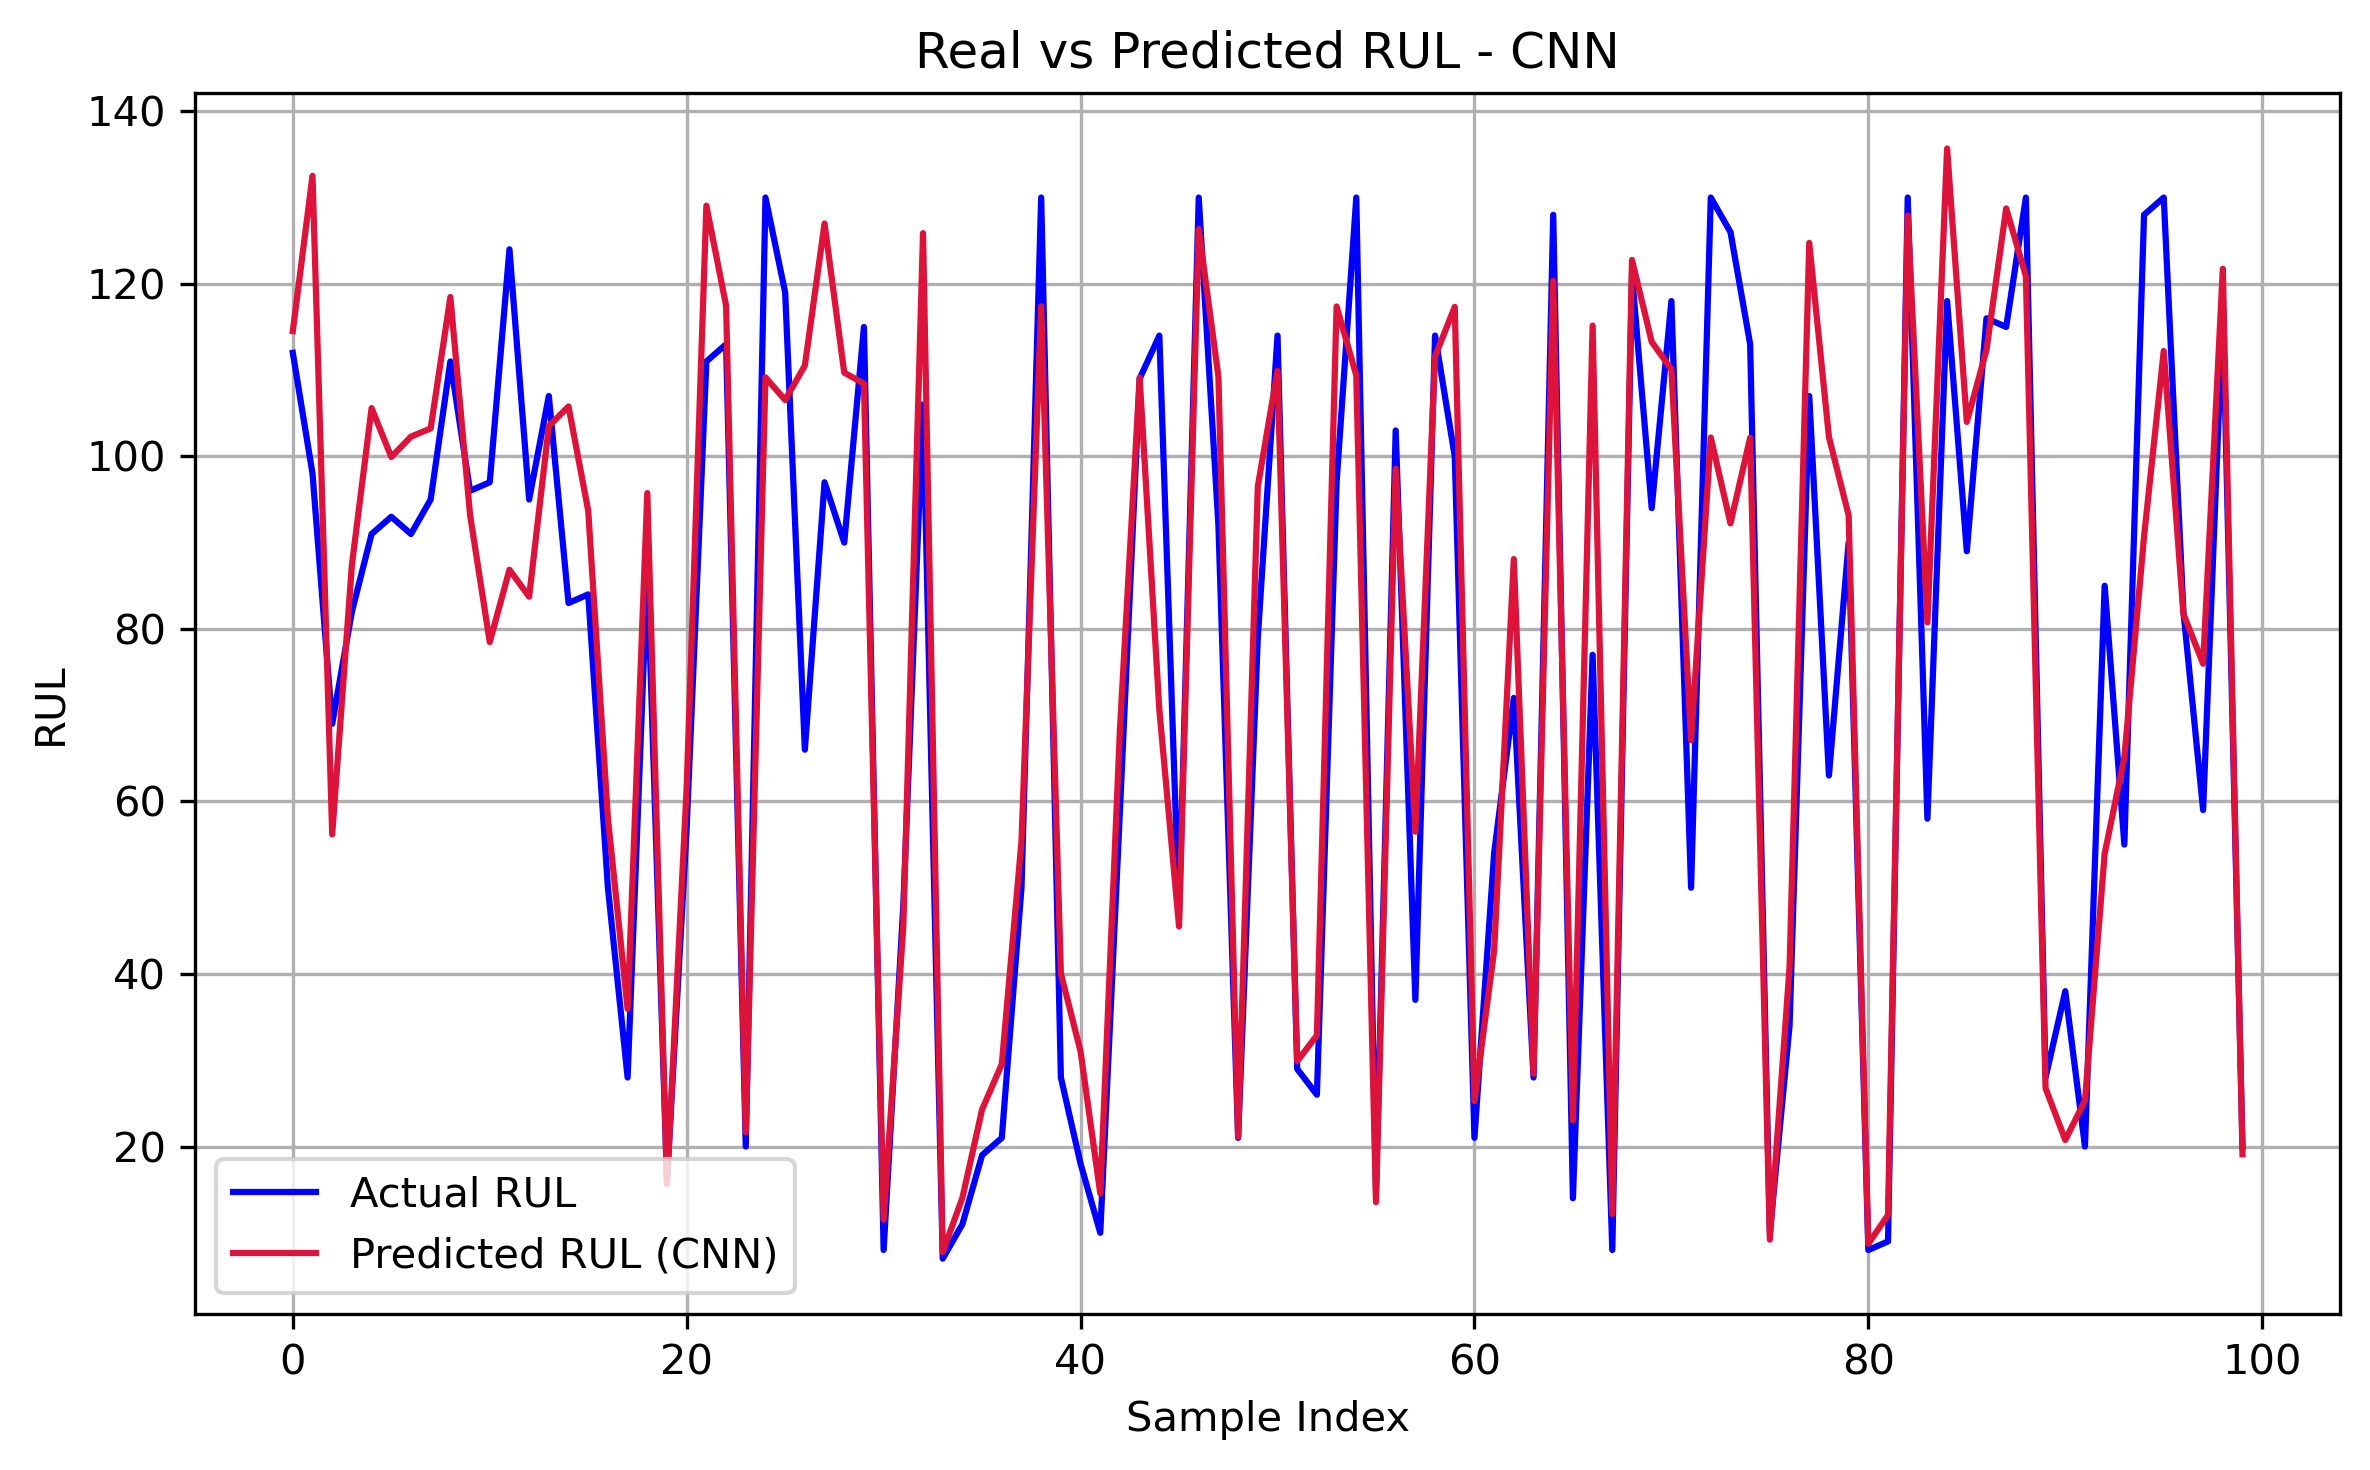

In [77]:
# Plot Real VS Predicted RUL for CNN model
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5), dpi=300)
plt.plot(y_test, label='Actual RUL', color='blue')
plt.plot(model_cnn.predict(X_test_norm).flatten(), label='Predicted RUL (CNN)', color='crimson')
plt.title('Real vs Predicted RUL - CNN', fontsize=12)
plt.xlabel('Sample Index', fontsize=10)
plt.ylabel('RUL', fontsize=10)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(r'G:\Artificial_Intelligence\Tamrin\Tamrin5\Results\Real_VS_Predicted_RUL_CNN.png')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step


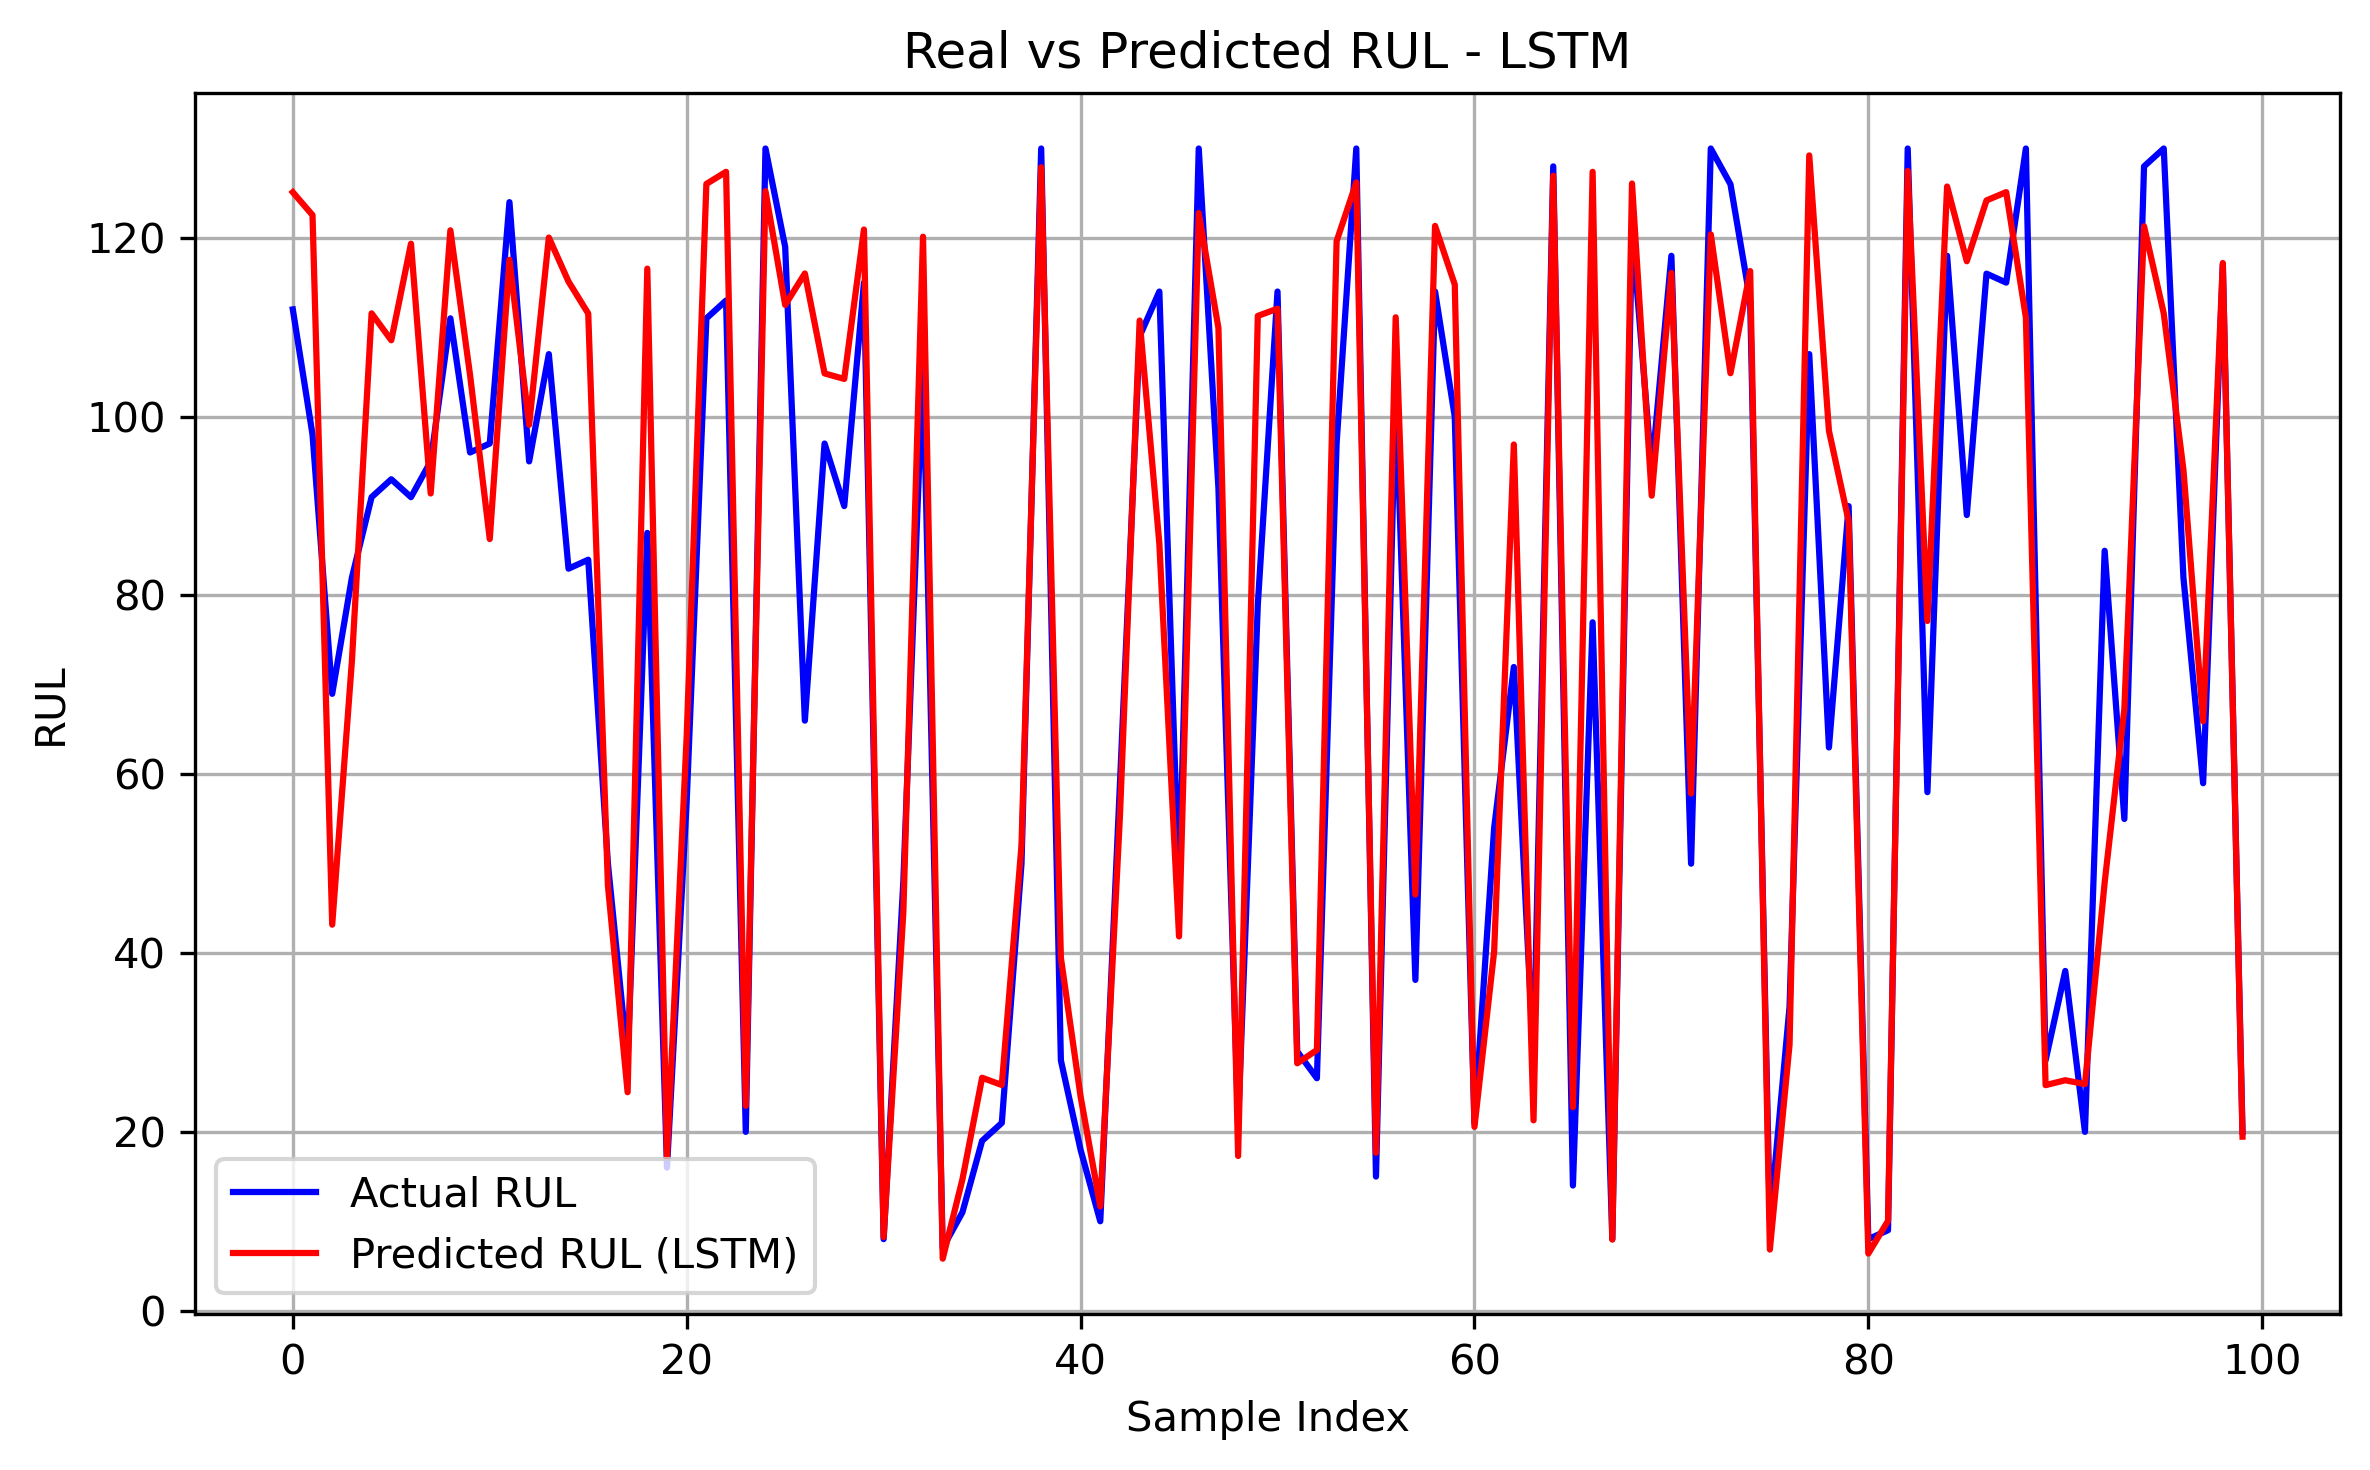

In [81]:
# Plot Real VS Predicted RUL for LSTM model

plt.figure(figsize=(8, 5), dpi=300)
plt.plot(y_test, label='Actual RUL', color='blue')
plt.plot(model_lstm.predict(X_test_norm).flatten(), label='Predicted RUL (LSTM)', color='red')
plt.title('Real vs Predicted RUL - LSTM', fontsize=12)
plt.xlabel('Sample Index', fontsize=10)
plt.ylabel('RUL', fontsize=10)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(r'G:\Artificial_Intelligence\Tamrin\Tamrin5\Results\Real_VS_Predicted_RUL_LSTM.png')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


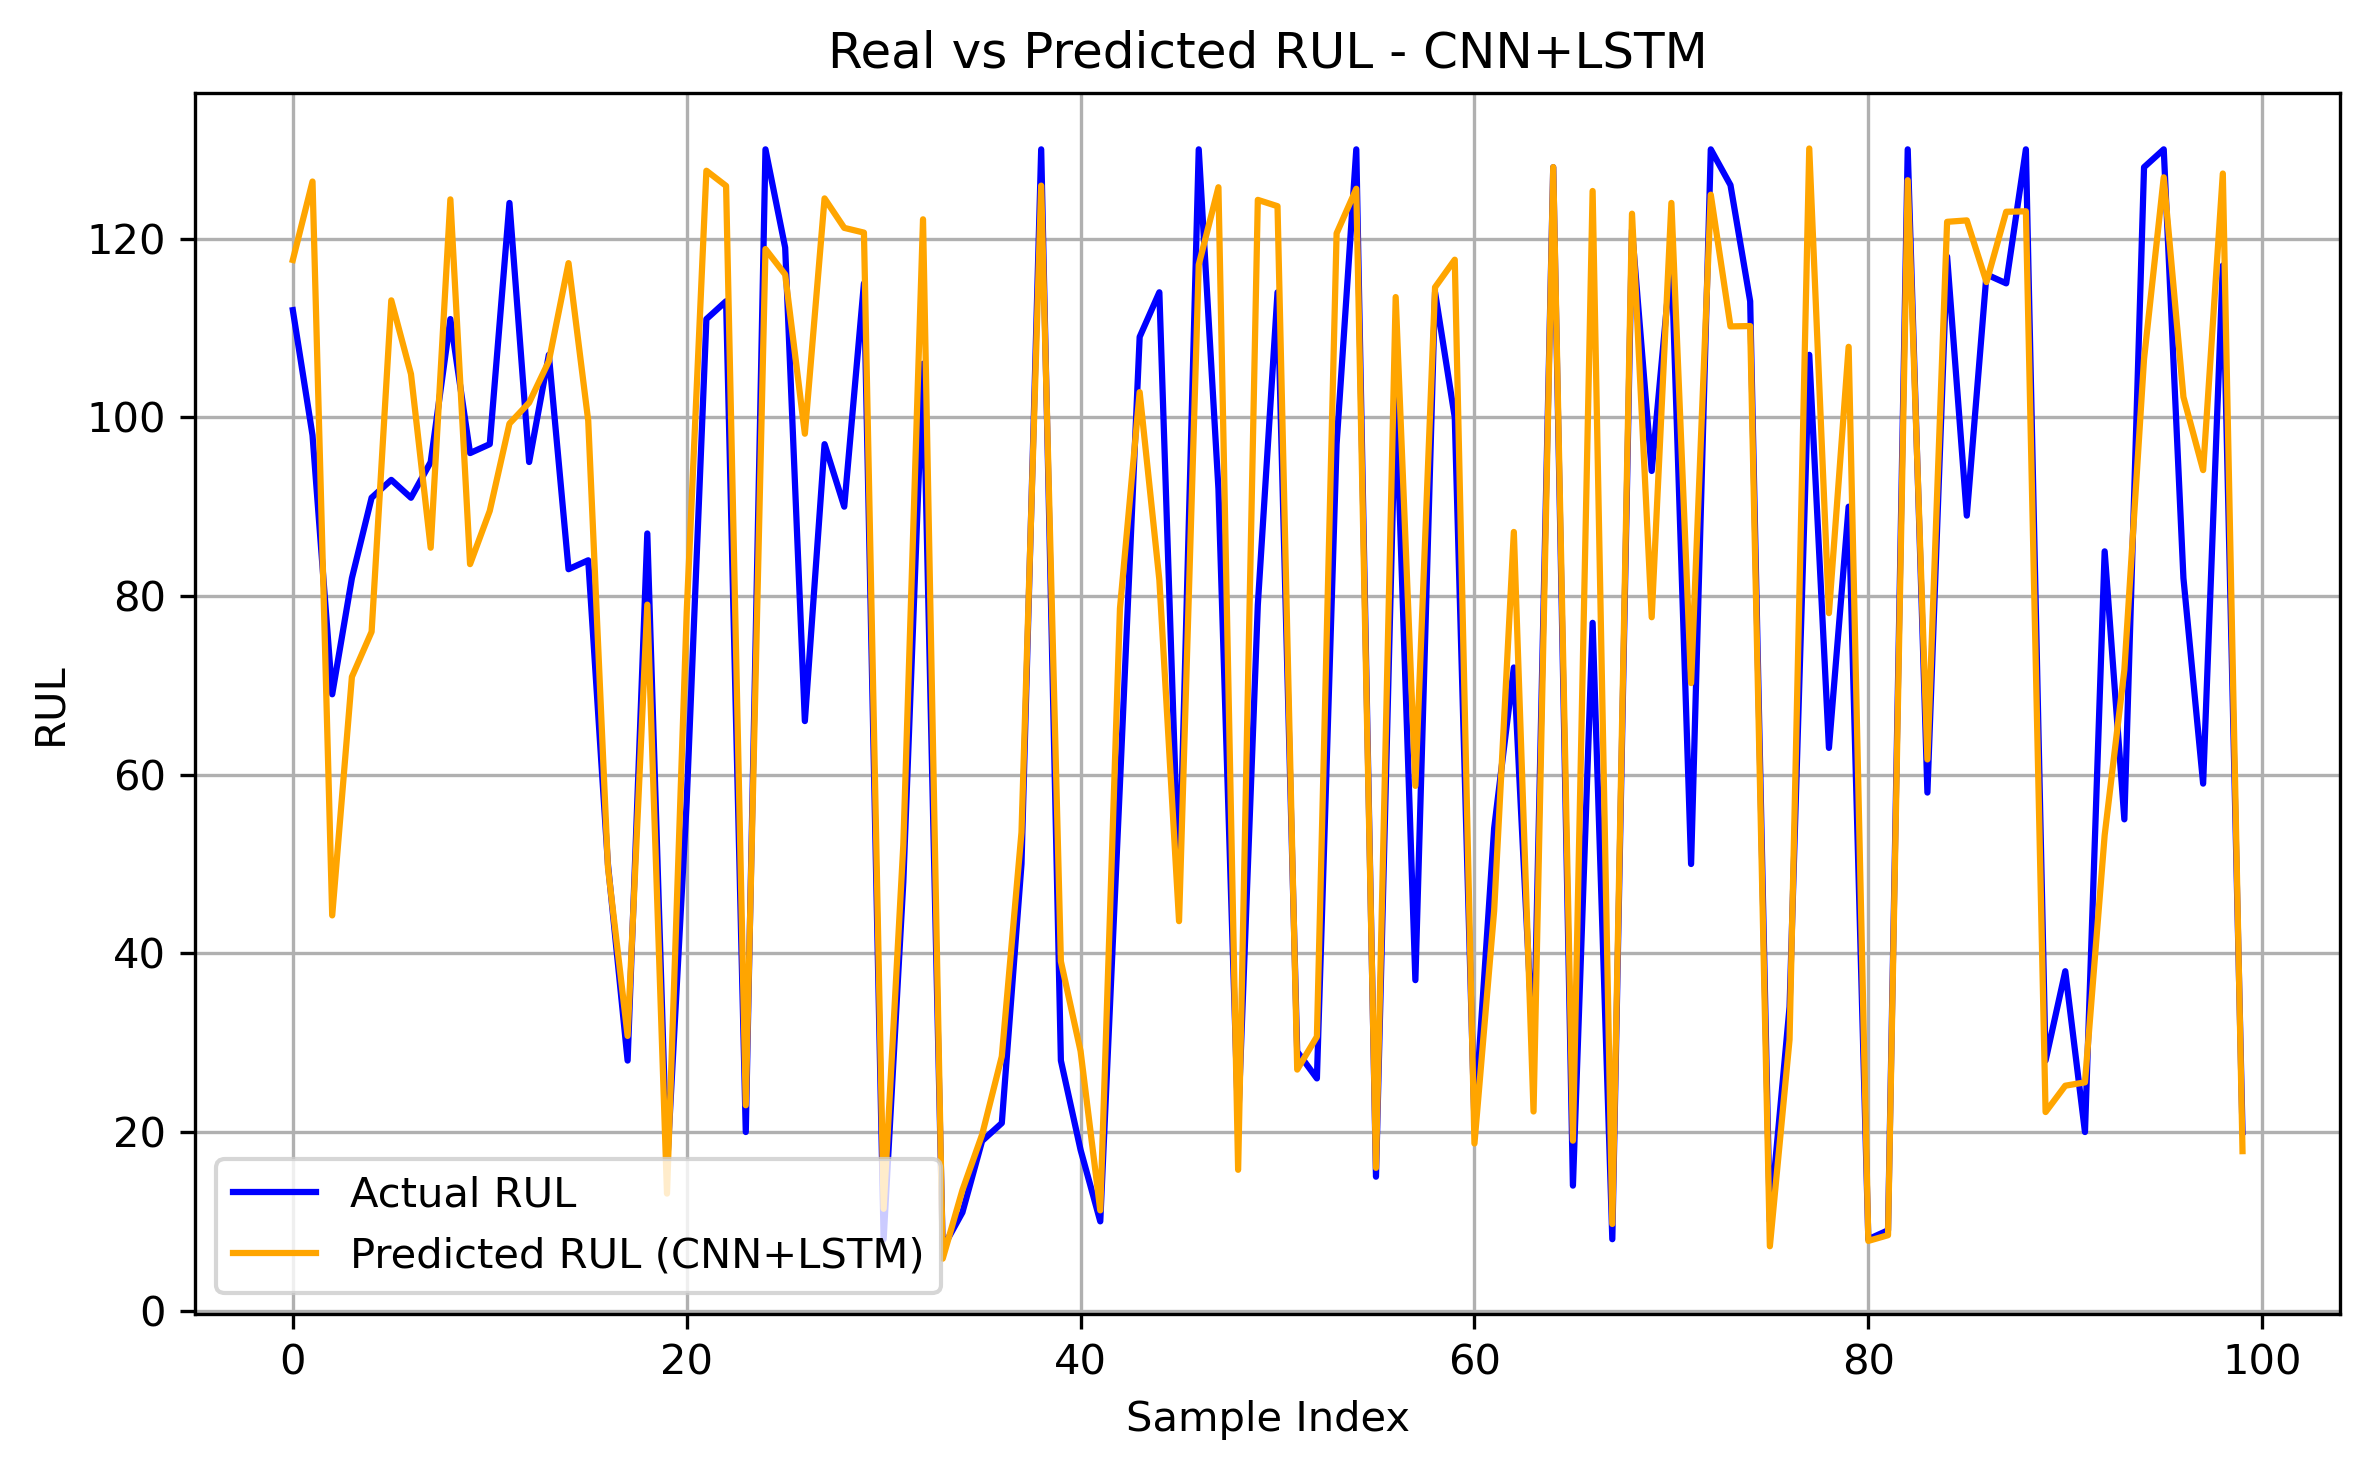

In [97]:
# Plot Real VS Predicted RUL for CNN + LSTM model

plt.figure(figsize=(8, 5), dpi=300)
plt.plot(y_test, label='Actual RUL', color='blue')
plt.plot(model_cnn_lstm.predict(X_test_norm).flatten(), label='Predicted RUL (CNN+LSTM)', color='orange')
plt.title('Real vs Predicted RUL - CNN+LSTM', fontsize=12)
plt.xlabel('Sample Index', fontsize=10)
plt.ylabel('RUL', fontsize=10)
plt.legend(loc='lower left', bbox_to_anchor=(0.0, 0.0), fancybox=True, shadow=False)
plt.grid(True)
plt.tight_layout()
plt.savefig(r'G:\Artificial_Intelligence\Tamrin\Tamrin5\Results\Real_VS_Predicted_RUL_CNN+LSTM.png')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


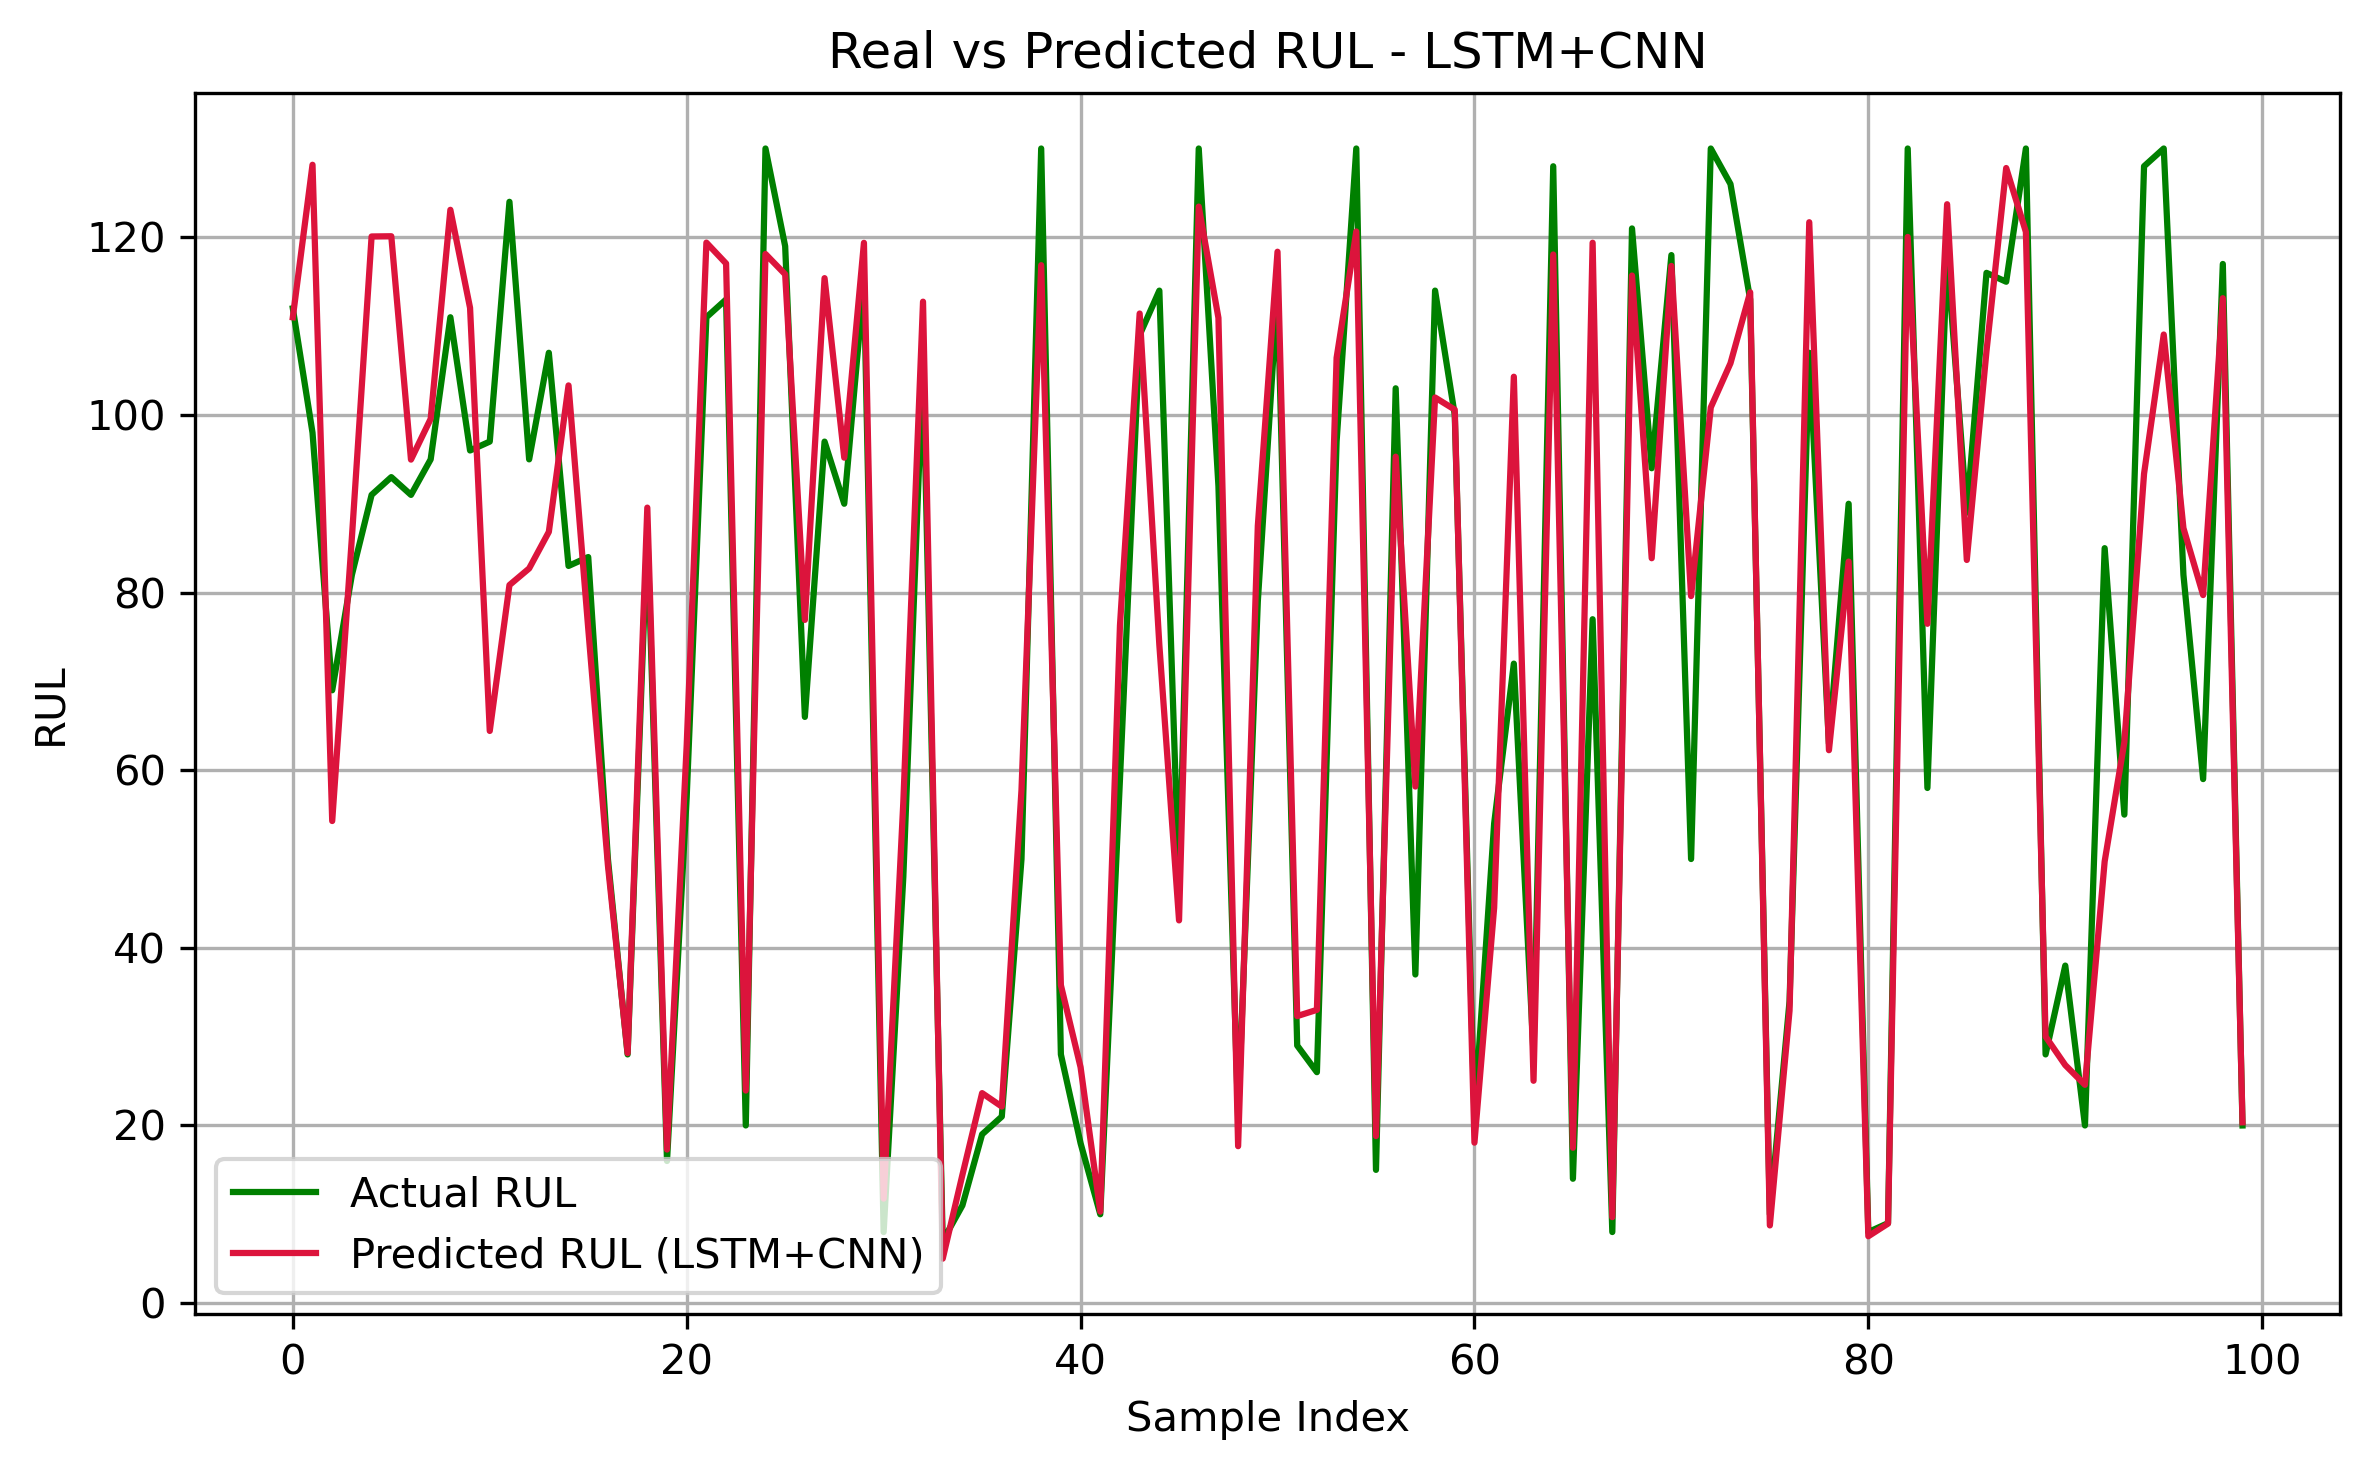

In [99]:
# Plot Real VS Predicted RUL for LSTM + CNN model

plt.figure(figsize=(8, 5), dpi=300)
plt.plot(y_test, label='Actual RUL', color='green')
plt.plot(model_lstm_cnn.predict(X_test_norm).flatten(), label='Predicted RUL (LSTM+CNN)', color='crimson')
plt.title('Real vs Predicted RUL - LSTM+CNN', fontsize=12)
plt.xlabel('Sample Index', fontsize=10)
plt.ylabel('RUL', fontsize=10)
plt.legend(loc='lower left', bbox_to_anchor=(0.0, 0.0), fancybox=True, shadow=False)
plt.grid(True)
plt.tight_layout()
plt.savefig(r'G:\Artificial_Intelligence\Tamrin\Tamrin5\Results\Real_VS_Predicted_RUL_LSTM+CNN.png')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


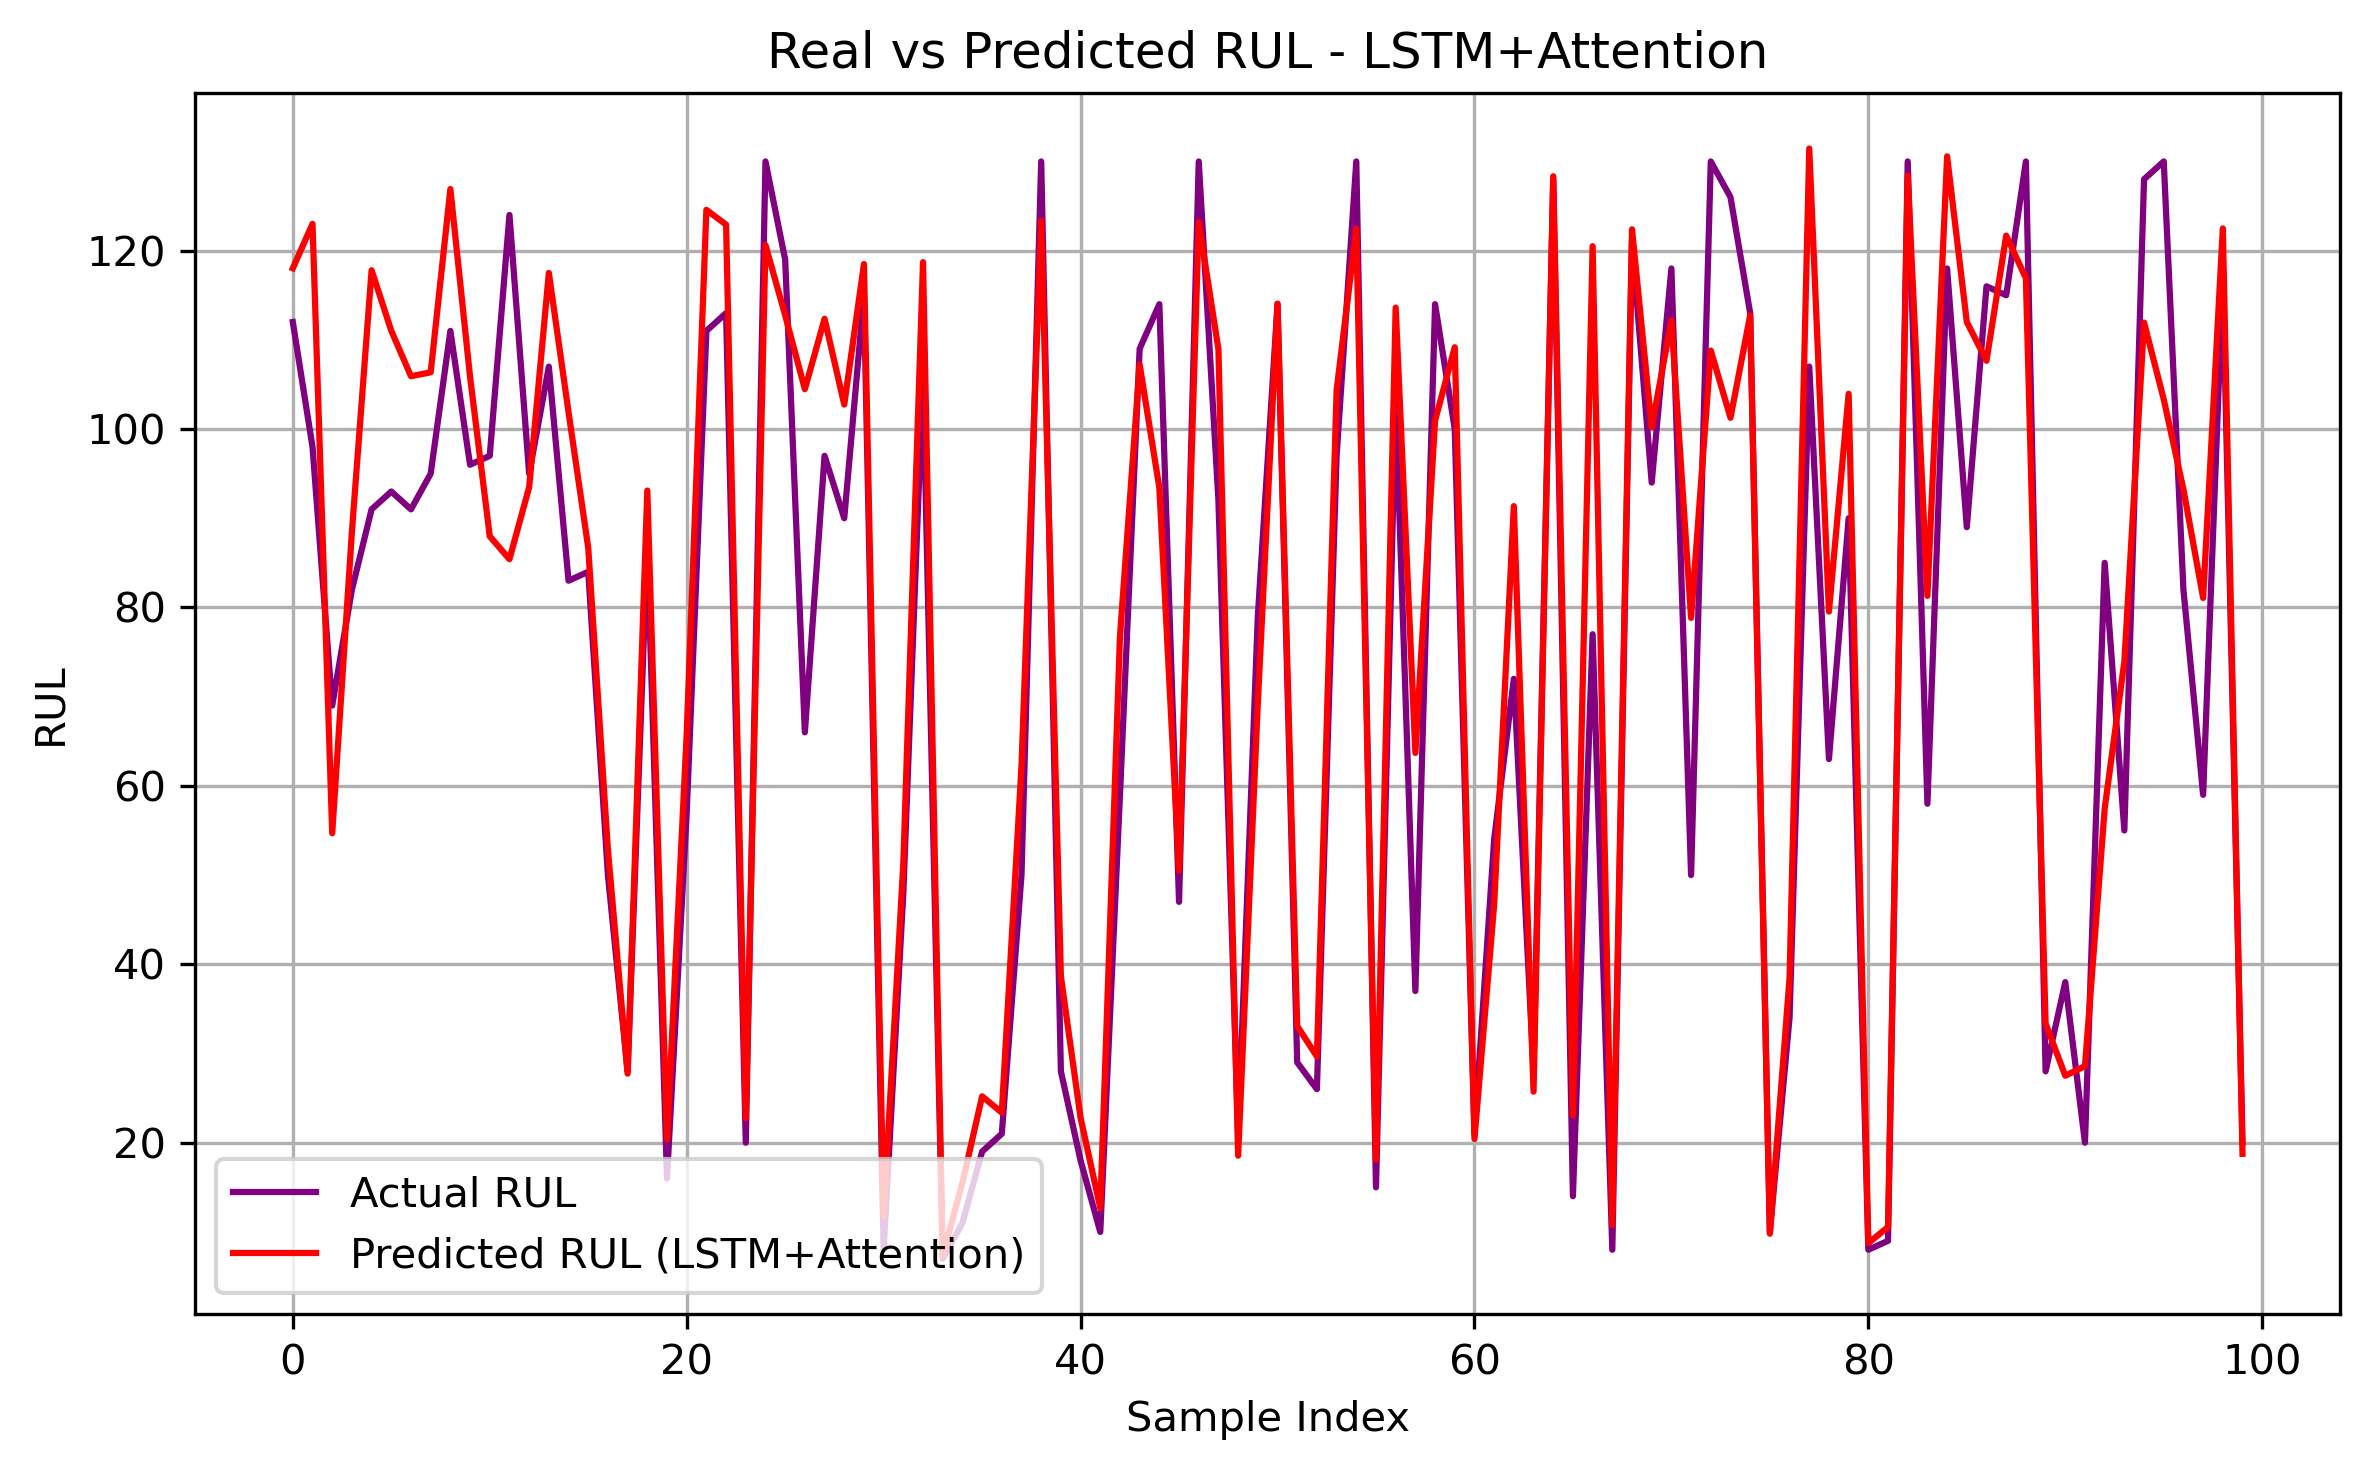

In [101]:
# Plot Real VS Predicted RUL for LSTM + Attention model

plt.figure(figsize=(8, 5), dpi=300)
plt.plot(y_test, label='Actual RUL', color='purple')
plt.plot(model_lstm_att.predict(X_test_norm).flatten(), label='Predicted RUL (LSTM+Attention)', color='red')
plt.title('Real vs Predicted RUL - LSTM+Attention', fontsize=12)
plt.xlabel('Sample Index', fontsize=10)
plt.ylabel('RUL', fontsize=10)
plt.legend(loc='lower left', bbox_to_anchor=(0.0, 0.0), fancybox=True, shadow=False)
plt.grid(True)
plt.tight_layout()
plt.savefig(r'G:\Artificial_Intelligence\Tamrin\Tamrin5\Results\Real_VS_Predicted_RUL_LSTM+Attention.png')
plt.show()

### ***Step 2: Model Evaluation Criteria***

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import time

# Define helper function
def evaluate_model(y_true, y_pred, training_time):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1))) * 100  # Avoid divide-by-zero
    return {
        'MAE': round(mae, 2),
        'RMSE': round(rmse, 2),
        'R2': round(r2, 4),
        'MAPE (%)': round(mape, 2),
        'Train Time (s)': round(training_time, 2)
    }

# Training times
train_times = {
    'CNN': cnn_train_time,
    'LSTM': lstm_train_time,
    'CNN+LSTM': cnn_lstm_train_time,
    'LSTM+CNN': lstm_cnn_train_time,
    'LSTM+Attention': lstm_att_train_time
}

# Predict on test set
preds = {
    'CNN': model_cnn.predict(X_test_norm).flatten(),
    'LSTM': model_lstm.predict(X_test_norm).flatten(),
    'CNN+LSTM': model_cnn_lstm.predict(X_test_norm).flatten(),
    'LSTM+CNN': model_lstm_cnn.predict(X_test_norm).flatten(),
    'LSTM+Attention': model_lstm_att.predict(X_test_norm).flatten()
}

# Evaluate all models
results = {}
for name, y_pred in preds.items():
    results[name] = evaluate_model(y_test, y_pred, train_times[name])

# Display results as DataFrame
import pandas as pd
results_df = pd.DataFrame(results).T  # Transpose for readability
print("Model Evaluation Results:")
print(results_df)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Model Evaluation Results:
                  MAE   RMSE      R2  MAPE (%)  Train Time (s)
CNN             11.88  15.99  0.8455     18.99          376.76
LSTM            10.88  15.25  0.8595     16.89         1525.29
CNN+LSTM        11.87  16.05  0.8444     18.59          568.77
LSTM+CNN        10.52  14.76  0.8684     15.90          937.68
LSTM+Attention  10.77  14.18  0.8786     17.55          811.84
